# Problem Statement

In Telecom industry, which experiences 15%-25% annual churn rate, and aquiring new customer is 5 to 10 times more costlier  **customer retention** has become very important than customer aquisition. So **retaining high profitable customers is the number one business goal**. Predicting churn based on Usage of the Service by customer is the problem we are trying to solve in this case study. As top 20% customers contribute to 80% of revenue, we will focus on high value customers in this case study.
<br>
Business Objective is to predict the churn based on 4th month, based on data from last 3 months.<br>
First two months are called good phase of customer journey.<br>
Third month is action phase, where customer experience has began to decline due to various reasons and we need corrective actions <br>
We will be building models to predict the churn which should solve the below 2 purposes.
1. To predict if a high value cutomer will churn or not.
2. To identify important variables of churn.

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.
Finally, recommend strategies to manage customer churn based on your observations.

In [1]:
# Perform Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Set Pandas to display more columns and rows
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)

In [2]:
# Read the data
churn_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
churn_data.shape

(99999, 226)

We have 226 columns and 99999 rows in our data.

In [4]:
# Read few rows of Data
churn_data.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29          NaN        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91           NaN          16.23          33.49          31.64   
8        136.48        108.71 

In [5]:
# Understand the columns and Data Types
churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

We have 214 numeric variables and 12 categorical variables.

Create a working copy of data before performing any operations on data.

In [6]:
churn_data_work = churn_data.copy()

# Filter high-value customers

Churn is to be performed on high valued customers only.
Criteria for High Value Customers - Those who have recharged with an amount more than or equal to 70th percentile of the average recharge amount in the first two months (6 and 7) ie. Good Phase.

In [7]:
# Create derived features total_rech_amt_data_* to calculate the total recharge data amount
# We do it only for 6,7,8 since we will drop 9th month column after identifying churn.

churn_data_work['total_rech_amt_data_6'] = churn_data_work['total_rech_data_6'] * churn_data_work['av_rech_amt_data_6']
churn_data_work['total_rech_amt_data_7'] = churn_data_work['total_rech_data_7'] * churn_data_work['av_rech_amt_data_7']
churn_data_work['total_rech_amt_data_8'] = churn_data_work['total_rech_data_8'] * churn_data_work['av_rech_amt_data_8']

churn_data_work['total_amt_6'] = churn_data_work[['total_rech_amt_6','total_rech_amt_data_6']].sum(axis=1)
churn_data_work['total_amt_7'] = churn_data_work[['total_rech_amt_7','total_rech_amt_data_7']].sum(axis=1)

# Calculate Average of 6th and 7th month total recharge amount.
churn_data_work['avg_amt_data_6_7'] = churn_data_work[['total_amt_6','total_amt_7']].mean(axis=1)

In [8]:
# View the newly created derived features.
churn_data_work[['total_rech_amt_data_6', 'total_rech_amt_6', 'total_amt_6','total_rech_amt_data_7', 'total_rech_amt_7', 'total_amt_7','avg_amt_data_6_7']].head()

total_rech_amt_data_6  total_rech_amt_6  total_amt_6  \
0                  252.0               362        614.0   
1                    NaN                74         74.0   
2                    NaN               168        168.0   
3                    NaN               230        230.0   
4                   56.0               196        252.0   

   total_rech_amt_data_7  total_rech_amt_7  total_amt_7  avg_amt_data_6_7  
0                  252.0               252        504.0             559.0  
1                  154.0               384        538.0             306.0  
2                    NaN               315        315.0             241.5  
3                    NaN               310        310.0             270.0  
4                    NaN               350        350.0             301.0

In [9]:
# Calculating the 70th percentile of average recharge.
percentile_70 = churn_data_work['avg_amt_data_6_7'].quantile(0.7)
percentile_70

478.0

In [10]:
# Inorder to get the High Value Customer we will filter out the values whose recharge amount is more than 70 percentile
churn_data_hv = churn_data_work[(churn_data_work['avg_amt_data_6_7'] >= percentile_70)]
churn_data_hv.info()
churn_data_hv.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 232 entries, mobile_number to avg_amt_data_6_7
dtypes: float64(185), int64(35), object(12)
memory usage: 53.3+ MB


(30001, 232)

In [11]:
# Drop the columns created for filtering the High Value Customers.
cols_to_drop = ['avg_amt_data_6_7','total_amt_6','total_amt_7']
churn_data_hv = churn_data_hv.drop(cols_to_drop,axis=1)
churn_data_hv.shape

(30001, 229)

# Derive Churn

In [12]:
# Define new column churn with 0 - not churn, 1- churn
# Define churn as no incoming or outgoing calls and no data usage ie. 
# total_ic_mou_9 = 0 AND total_og_mou_9 = 0 AND vol_2g_mb_9 = 0 AND vol_3g_mb_9 = 0
churn_data_hv['churn'] = churn_data_hv.apply(lambda x : 1 if (x.total_ic_mou_9 == 0 and x.total_og_mou_9 == 0 and x.vol_2g_mb_9 == 0 and x.vol_3g_mb_9 == 0) else 0, axis=1)

In [13]:
#Find the ratio's churn and non churn in the data set.
round((churn_data_hv['churn'].value_counts()/len(churn_data_hv.index))*100,2)

0    91.86
1     8.14
Name: churn, dtype: float64

In [14]:
#Find all the columns for 9th month, ie ending with _9.
cols_9_month = churn_data_hv.filter(regex='.*_9$', axis=1).columns
print(cols_9_month)
print(len(cols_9_month))

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [15]:
churn_data_hv.shape

(30001, 230)

In [16]:
# Drop all columns of 9th month, ie ending with _9.
churn_data_hv = churn_data_hv.drop(cols_9_month,axis=1)
churn_data_hv = churn_data_hv.drop('sep_vbc_3g', axis=1)

In [17]:
churn_data_hv.shape

(30001, 175)

In [18]:
churn_data_hv_der = churn_data_hv.copy()

# Data Preprocessing

### Missing Values

In [19]:
#Find Missing Values percentage
round(100*(churn_data_hv_der.isnull().sum()/len(churn_data_hv_der.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou

In [20]:
numerical_cols=['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 
               'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 
               'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
               'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 
               'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
                'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
               'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 
               'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
               'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
               'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
               'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
               'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
               'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
               'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
               'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
               'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6',
               'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6',
               'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 
               'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
               'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
               'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 
               'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_amt_data_6', 'total_rech_amt_data_7',
               'total_rech_amt_data_8','circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 
              'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
             'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7','std_ic_t2o_mou_8']
categorical_cols=['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7' ,'fb_user_8', 'churn']

In [21]:
churn_data_hv_der[numerical_cols].describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30001.000000  30001.000000  30001.000000  29456.000000  29464.000000   
mean     558.490824    560.782203    508.597957    265.618262    272.700470   
std      460.640461    479.776947    501.961981    462.493645    482.972367   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      309.865000    309.826000    231.473000     19.240000     18.155000   
50%      481.694000    480.943000    427.585000     88.060000     86.885000   
75%      699.943000    698.315000    661.491000    297.415000    298.087500   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  28827.000000  29456.000000  29464.000000  28827.000000   29456.000000   
mean     243.646938    380.608111    384.994337    348.723294      16.408431   
std      465.200856    484.257474    500.807874    486.918550      76.973057   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       14.255000     78.575000     76.040000     58.670000       0.000000   
50%       72.930000    229.635000    227.120000    197.590000       0.000000   
75%      255.025000    494.780000    500.365000    455.385000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29464.000000   28827.000000   29456.000000   29464.000000   
mean       12.872921      13.009645      27.063178      20.519370   
std        76.454034      75.575865     117.218920      96.933381   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   28827.000000      29456.000000      29464.000000      28827.000000   
mean       20.674656         86.047905         87.235755         81.256858   
std       106.751862        230.609510        242.427257        231.399901   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          5.030000          5.280000          3.830000   
50%         0.000000         25.580000         25.780000         23.240000   
75%         0.000000         79.765000         80.282500         76.040000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      29456.000000      29464.000000      28827.000000      29456.000000   
mean         166.263652        165.980922        157.937216          6.461494   
std          251.423301        242.754684        236.315181         22.310305   
min            0.000000          0.000000          0.000000          0.000000   
25%           21.137500         22.910000         17.530000          0.000000   
50%           80.240000         81.685000         74.540000          0.110000   
75%          212.417500        211.745000        205.860000          4.390000   
max         4729.740000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      29464.000000      28827.000000      29456.000000      29464.000000   
mean           6.540759          6.126112          1.604247          1.924320   
std           22.125961         19.858510          6.357757          9.238487   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.210000          0.0000

In [22]:
#Missing values follow a pattern of 1.82, 1.79, 3.91 for calls for 6,7,8 months  and 44.15, 43.15, 46.83 for data for 6,7,8 months.
#Impute the numerical values with 0 indicating that they did not use the service.
churn_data_hv_der[numerical_cols] = churn_data_hv_der[numerical_cols].apply(lambda x: x.fillna(0))

In [23]:
#Find Missing Values percentage again
round(100*(churn_data_hv_der.isnull().sum()/len(churn_data_hv_der.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.00
std_og_t2o_mou               0.00
loc_ic_t2o_mou               0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  0.00
onnet_mou_7                  0.00
onnet_mou_8                  0.00
offnet_mou_6                 0.00
offnet_mou_7                 0.00
offnet_mou_8                 0.00
roam_ic_mou_6                0.00
roam_ic_mou_7                0.00
roam_ic_mou_8                0.00
roam_og_mou_6                0.00
roam_og_mou_7                0.00
roam_og_mou_8                0.00
loc_og_t2t_mou_6             0.00
loc_og_t2t_mou_7             0.00
loc_og_t2t_mou_8             0.00
loc_og_t2m_mou_6             0.00
loc_og_t2m_mou_7             0.00
loc_og_t2m_mou_8             0.00
loc_og_t2f_mou

In [24]:
# Apply -1 to categorical variables with missing values to create a new category.
churn_data_hv_der[categorical_cols] = churn_data_hv_der[categorical_cols].apply(lambda x: x.fillna(-1))

In [25]:
churn_data_hv_der[categorical_cols] = churn_data_hv_der[categorical_cols].astype("category")

In [26]:
#Find Missing Values percentage again
round(100*(churn_data_hv_der.isnull().sum()/len(churn_data_hv_der.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.00
std_og_t2o_mou               0.00
loc_ic_t2o_mou               0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  0.00
onnet_mou_7                  0.00
onnet_mou_8                  0.00
offnet_mou_6                 0.00
offnet_mou_7                 0.00
offnet_mou_8                 0.00
roam_ic_mou_6                0.00
roam_ic_mou_7                0.00
roam_ic_mou_8                0.00
roam_og_mou_6                0.00
roam_og_mou_7                0.00
roam_og_mou_8                0.00
loc_og_t2t_mou_6             0.00
loc_og_t2t_mou_7             0.00
loc_og_t2t_mou_8             0.00
loc_og_t2m_mou_6             0.00
loc_og_t2m_mou_7             0.00
loc_og_t2m_mou_8             0.00
loc_og_t2f_mou

In [27]:
#Impute with mode for the date fields with less missing values, and delete the other columns
date_cols_to_impute=['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
for col in date_cols_to_impute:
    churn_data_hv_der[col].fillna(churn_data_hv_der[col].mode()[0], inplace=True)
    churn_data_hv_der[col] = pd.to_datetime(churn_data_hv_der[col]).dt.day

In [28]:
print(churn_data_hv_der.shape)
date_cols_to_remove=['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']
churn_data_hv_der = churn_data_hv_der.drop(date_cols_to_remove, axis=1)
print(churn_data_hv_der.shape)

(30001, 175)
(30001, 169)


In [29]:
#Find Missing Values percentage again
round(100*(churn_data_hv_der.isnull().sum()/len(churn_data_hv_der.index)),2)

mobile_number            0.0
circle_id                0.0
loc_og_t2o_mou           0.0
std_og_t2o_mou           0.0
loc_ic_t2o_mou           0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8  

In [30]:
churn_data_hv_der.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23          

In [31]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(churn_data_hv_der)
constant_columns = [column for column in churn_data_hv_der.columns
                    if column not in churn_data_hv_der.columns[constant_filter.get_support()]]
print(constant_columns)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [32]:
#Dropping constant columns
print(churn_data_hv_der.shape)
churn_data_hv_der = churn_data_hv_der.drop(constant_columns,axis=1)
print(churn_data_hv_der.shape)

(30001, 169)
(30001, 159)


In [33]:
qconstant_filter = VarianceThreshold(threshold=0.05)
qconstant_filter.fit(churn_data_hv_der)
qconstant_columns = [column for column in churn_data_hv_der.columns
                    if column not in churn_data_hv_der.columns[qconstant_filter.get_support()]]
print(qconstant_columns)

['spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8']


In [34]:
#Dropping quasi constant columns
print(churn_data_hv_der.shape)
churn_data_hv_der = churn_data_hv_der.drop(qconstant_columns,axis=1)
print(churn_data_hv_der.shape)

(30001, 159)
(30001, 156)


# Outlier Treatment

In [35]:
churn_data_hv_der.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    260.793024   
std     6.908784e+05    460.640461    479.776947    501.961981    459.644368   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
1%      7.000026e+09      1.000000      0.700000      0.000000      0.000000   
10%     7.000251e+09    171.605000    177.886000     84.000000      0.700000   
25%     7.000609e+09    309.865000    309.826000    231.473000     17.080000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
90%     7.002165e+09    994.099000    995.859000    977.345000    754.160000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1135.440000   
99%     7.002386e+09   1985.115000   1999.500000   1986.622000   2151.740000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     267.819295    234.112539    373.693961    378.103169    335.077044   
std      479.993989    458.448598    482.523558    498.923555    482.062509   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        0.580000      0.000000     11.260000     10.430000      2.200000   
25%       16.030000     10.390000     71.610000     69.910000     46.740000   
50%       82.810000     65.610000    222.540000    220.030000    182.790000   
75%      290.240000    239.960000    487.940000    494.010000    438.890000   
90%      784.480000    665.080000    895.830000    916.080000    823.680000   
95%     1185.790000   1074.590000   1256.610000   1272.290000   1167.540000   
99%     2201.960000   2159.110000   2326.360000   2410.890000   2193.130000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       16.110355      12.642504      12.500551      26.571547   
std        76.302156      75.785903      74.125281     116.205525   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.390000      14.290000      15.010000      50.430000   
95%        84.540000      55.640000      56.350000     145.410000   
99%       342.440000     280.460000     282.190000     530.710000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       20.152086      19.865615         84.484753         85.674287   
std        96.100428     104.719009        228.794004        240.525999   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.380000          4.610000   
50%         0.000000       0.000000         24.330000         24.680000   
75%         0.000000       0.000000         77.980000         78.340000   
90%        31.090000      28.880000        187.930000        1

We can clearly see we have outliers , We cap them instead of removing them.

In [36]:
def outlier_capping(data): 
    lower_limit = data.quantile(0.01)
    upper_limit = data.quantile(0.99)
    data[data<lower_limit] = lower_limit
    data[data>upper_limit] = upper_limit
    return data

In [37]:
churn_data_hv_der.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 156 entries, mobile_number to churn
dtypes: category(7), float64(120), int64(29)
memory usage: 34.5 MB


In [38]:
# cap outliers in the numeric columns (ignoring mobile_number)
numerical_cols = churn_data_hv_der.select_dtypes(include=['float64','int64']).columns
churn_data_hv_der[numerical_cols] = churn_data_hv_der[numerical_cols].apply(outlier_capping, axis=0)

In [39]:
churn_data_hv_der.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    548.809784    551.084737    498.243103    252.166035   
std     6.904265e+05    358.130151    360.433210    383.295094    403.510223   
min     7.000026e+09      1.000000      0.700000      0.000000      0.000000   
1%      7.000026e+09      1.000000      0.700000      0.000000      0.000000   
10%     7.000251e+09    171.605000    177.886000     84.000000      0.700000   
25%     7.000609e+09    309.865000    309.826000    231.473000     17.080000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
90%     7.002165e+09    994.099000    995.859000    977.345000    754.160000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1135.440000   
99%     7.002386e+09   1985.115000   1999.500000   1986.622000   2151.740000   
max     7.002386e+09   1985.115000   1999.500000   1986.622000   2151.740000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     258.623657    224.895572    365.893079    369.516995    325.038955   
std      418.167038    390.856953    434.200835    443.919067    409.754119   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        0.580000      0.000000     11.260000     10.430000      2.200000   
25%       16.030000     10.390000     71.610000     69.910000     46.740000   
50%       82.810000     65.610000    222.540000    220.030000    182.790000   
75%      290.240000    239.960000    487.940000    494.010000    438.890000   
90%      784.480000    665.080000    895.830000    916.080000    823.680000   
95%     1185.790000   1074.590000   1256.610000   1272.290000   1167.540000   
99%     2201.960000   2159.110000   2326.360000   2410.890000   2193.130000   
max     2201.960000   2159.110000   2326.360000   2410.890000   2193.130000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       13.572928       9.636307       9.763929      22.732495   
std        49.336952      38.699269      38.946961      79.312550   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.390000      14.290000      15.010000      50.430000   
95%        84.540000      55.640000      56.350000     145.410000   
99%       342.440000     280.460000     282.190000     530.710000   
max       342.440000     280.460000     282.190000     530.710000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       16.688892      15.985223         76.276691         76.684236   
std        62.862903      60.492319        149.890333        150.825195   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.380000          4.610000   
50%         0.000000       0.000000         24.330000         24.680000   
75%         0.000000       0.000000         77.980000         78.340000   
90%        31.090000      28.880000        187.930000        1

In [40]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(churn_data_hv_der)
constant_columns = [column for column in churn_data_hv_der.columns
                    if column not in churn_data_hv_der.columns[constant_filter.get_support()]]
print(constant_columns)

['og_others_7', 'og_others_8']


In [41]:
#Dropping constant columns after outlier treatment.
print(churn_data_hv_der.shape)
churn_data_hv_der = churn_data_hv_der.drop(constant_columns,axis=1)
print(churn_data_hv_der.shape)


(30001, 156)
(30001, 154)


# Derived Features

In [42]:
churn_data_hv_derived = churn_data_hv_der.copy()

In [43]:
churn_data_hv_derived.shape

(30001, 154)

In [44]:
#Calculate difference between 8th month and average of 6th and 7th month to create a derived variable diff
cols_for_diff = ['arpu','onnet_mou','offnet_mou','roam_ic_mou','roam_og_mou', 'loc_og_t2t_mou','loc_og_t2m_mou',
                 'loc_og_t2f_mou','loc_og_t2c_mou','loc_og_mou','std_og_t2t_mou','std_og_t2m_mou','std_og_t2f_mou',
                 'std_og_mou','isd_og_mou','spl_og_mou','total_og_mou','loc_ic_t2t_mou','loc_ic_t2m_mou',
                 'loc_ic_t2f_mou','loc_ic_mou','std_ic_t2t_mou','std_ic_t2m_mou','std_ic_t2f_mou','std_ic_mou','total_ic_mou',
                 'isd_ic_mou','ic_others','total_rech_num','total_rech_amt','max_rech_amt','total_rech_data',
                 'max_rech_data','av_rech_amt_data','vol_2g_mb','vol_3g_mb','arpu_2g','arpu_3g','monthly_2g','monthly_3g',
                 'sachet_2g','sachet_3g','total_rech_amt_data']

for col in cols_for_diff:
    month_6_col = col+"_6"
    month_7_col = col+"_7"
    month_8_col = col+"_8"
    derived_col = col+"_diff"
    churn_data_hv_derived[derived_col] = churn_data_hv_derived[month_8_col] - ((churn_data_hv_derived[month_6_col] + churn_data_hv_derived[month_7_col])/2)

In [45]:
churn_data_hv_derived.shape

(30001, 197)

In [46]:
#Drop Mobile Number since its an id field
churn_data_hv_derived = churn_data_hv_derived.drop('mobile_number', axis=1)

In [47]:
# Conversion of the number of years
churn_data_hv_derived['aon_years']=churn_data_hv_derived['aon']/365
churn_data_hv_derived['aon_years'] = churn_data_hv_derived['aon_years'].astype(int)

In [48]:
churn_data_hv_derived.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  1986.622        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

In [49]:
churn_data_hv_derived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 197 entries, arpu_6 to aon_years
dtypes: category(7), float64(161), int32(1), int64(28)
memory usage: 43.8 MB


# EDA

In [50]:
def plot_box(df, numeric_variable):
    sns.boxplot(y=df[numeric_variable])
    #plt.yscale('log')
    #plt.ylim(5, 50)
    plt.title("Distribution of "+ numeric_variable)
    plt.show()

In [51]:
def bar_plot(df,groupby_col,column):
    df.groupby(by=groupby_col)[column].sum().plot(kind= 'bar',figsize=(10,4))

In [52]:
def biVariate(colName):
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
    ax = sns.distplot(churn_data_hv_derived[churn_data_hv_derived['churn']==1][colName], bins = 30, ax = axes[0], kde = False)
    ax.set_title('Churn')
    ax = sns.distplot(churn_data_hv_derived[churn_data_hv_derived['churn']==0][colName], bins = 30, ax = axes[1], kde = False)
    ax.set_title('Non-Churn')

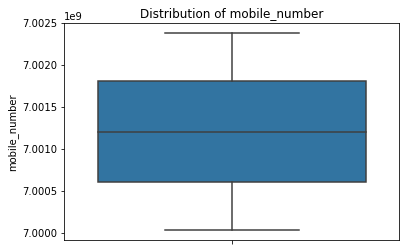

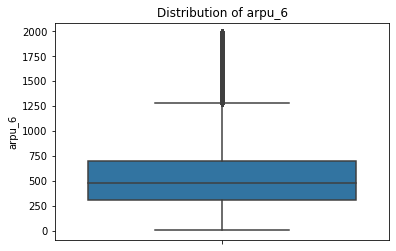

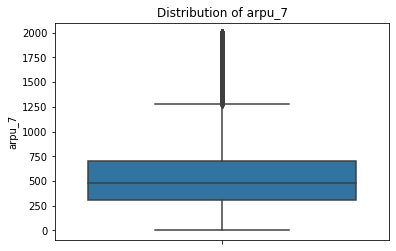

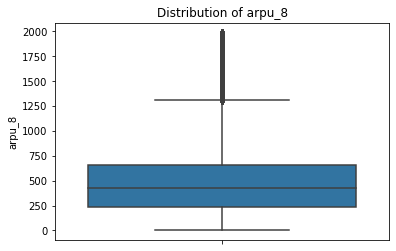

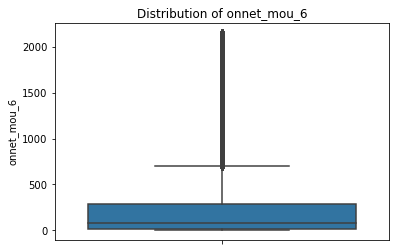

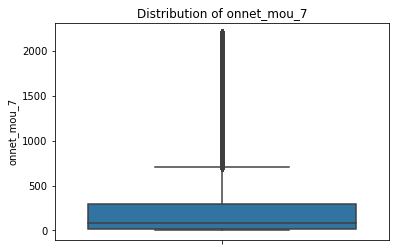

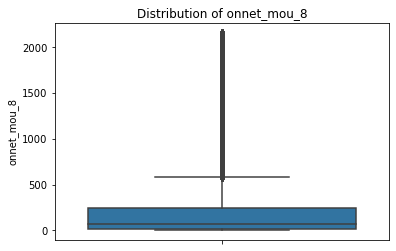

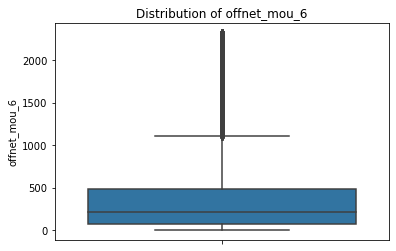

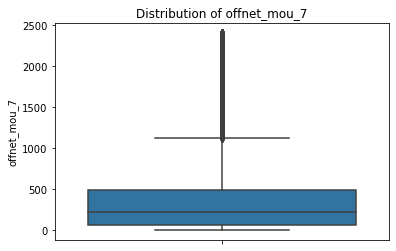

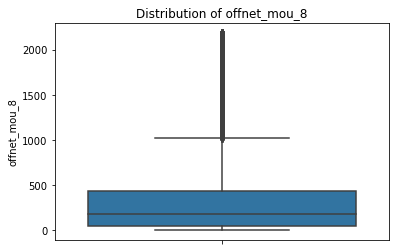

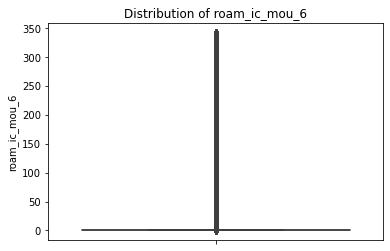

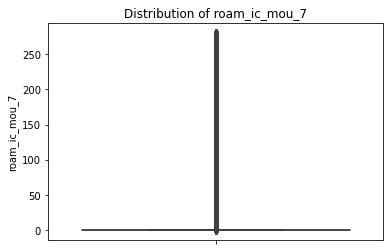

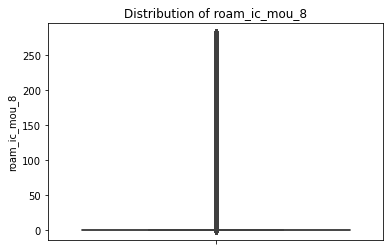

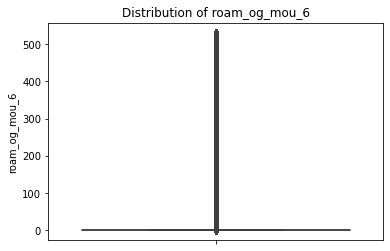

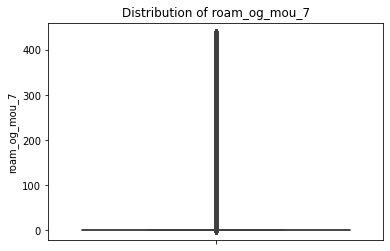

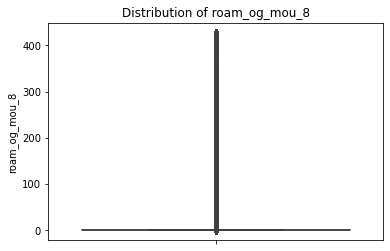

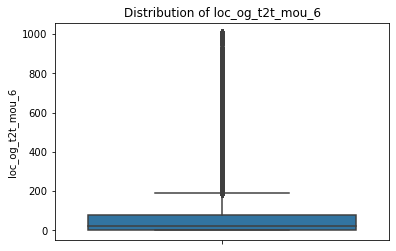

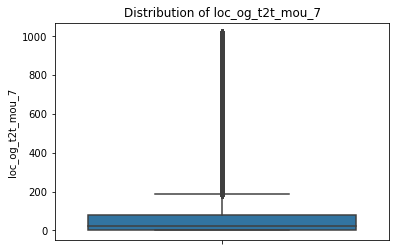

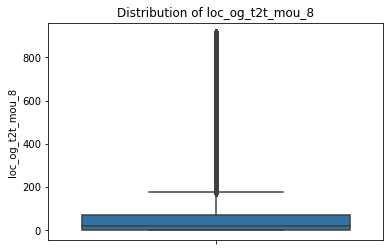

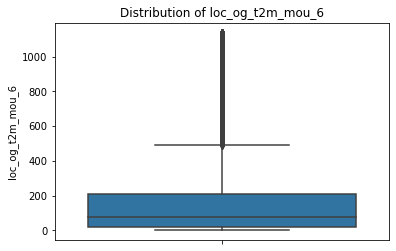

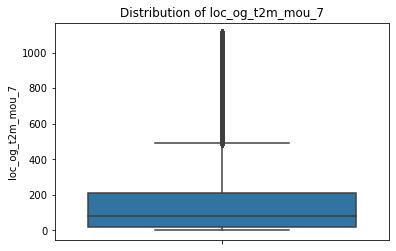

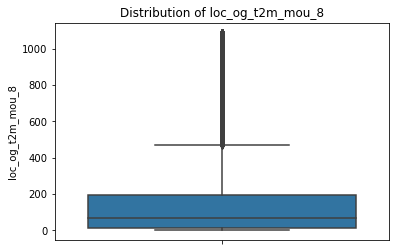

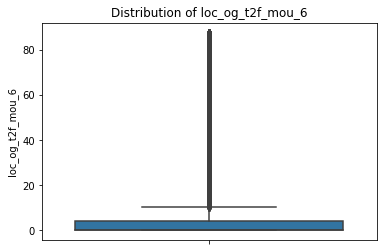

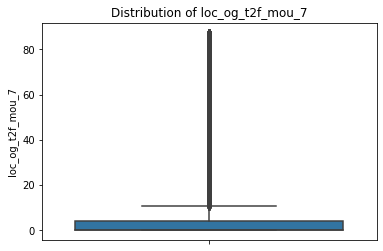

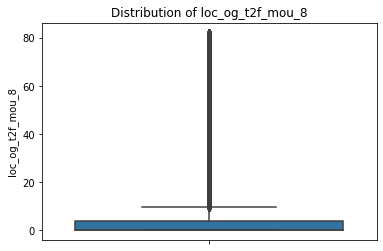

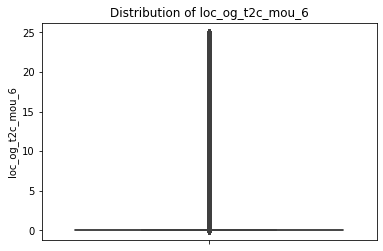

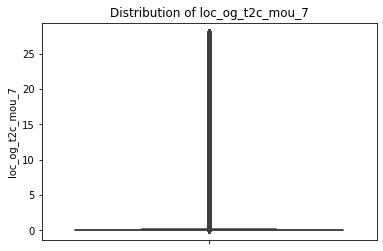

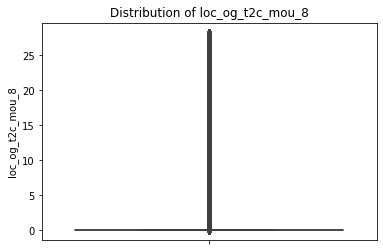

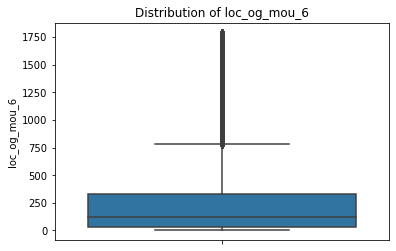

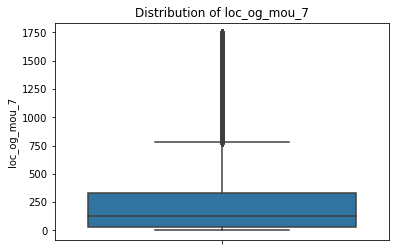

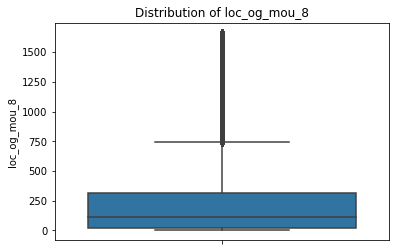

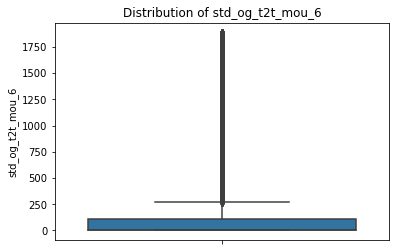

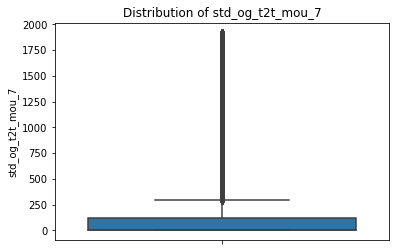

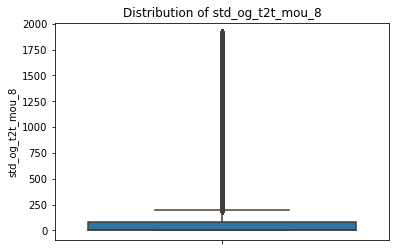

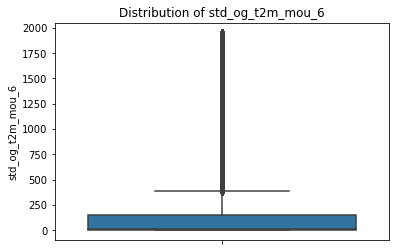

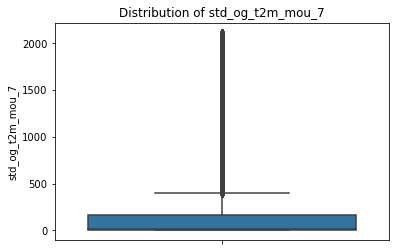

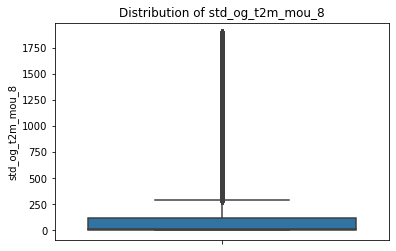

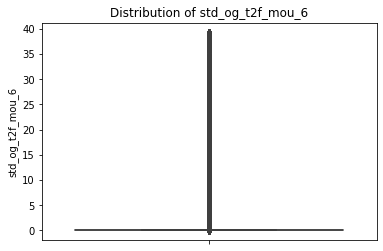

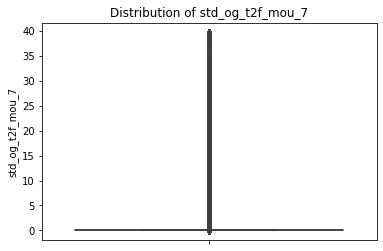

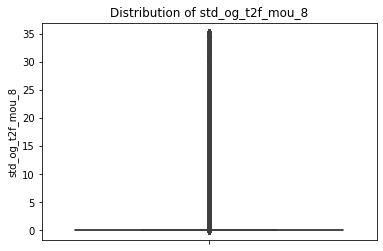

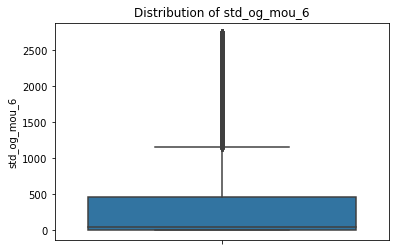

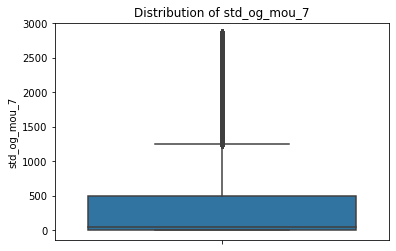

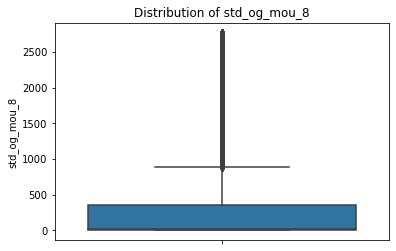

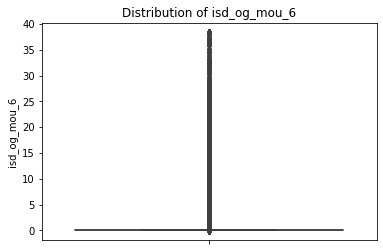

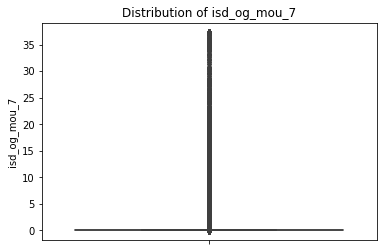

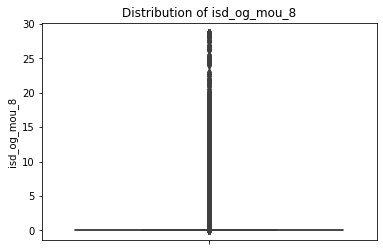

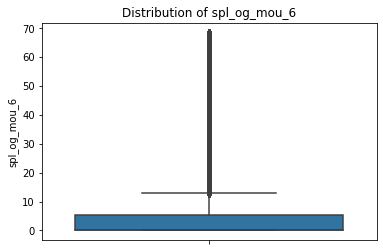

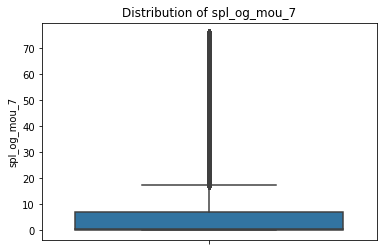

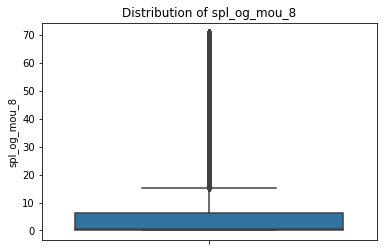

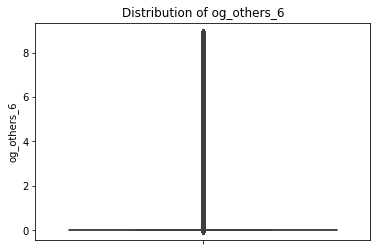

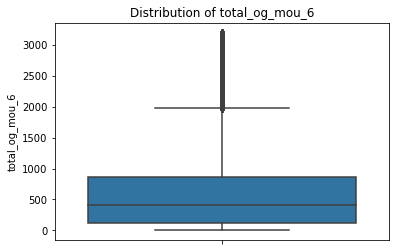

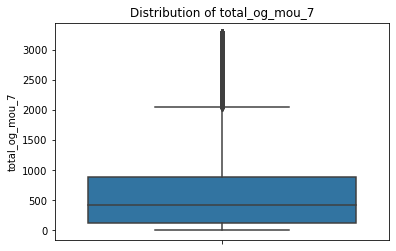

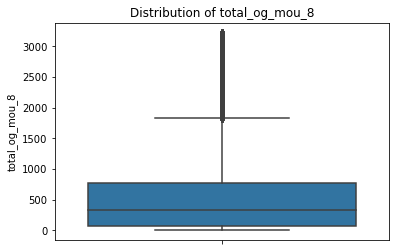

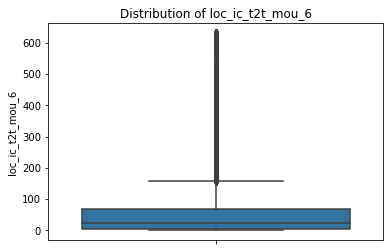

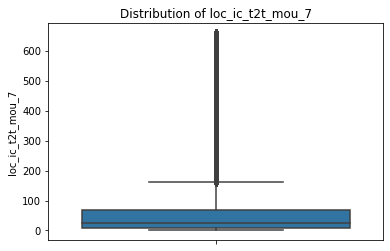

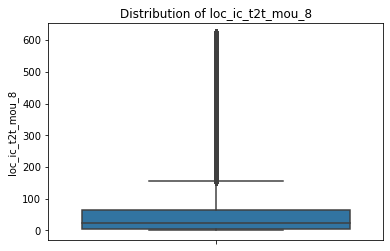

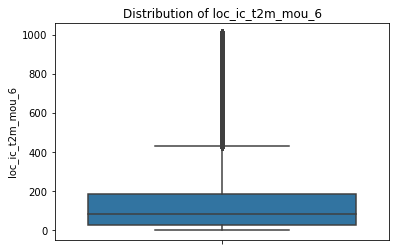

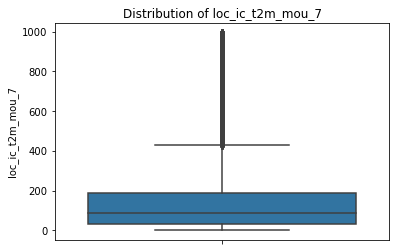

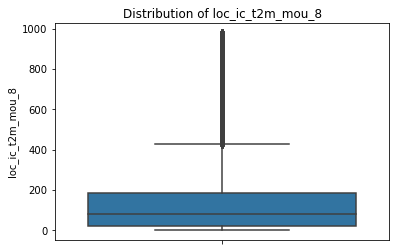

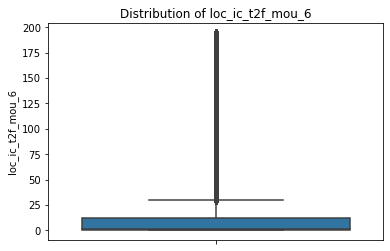

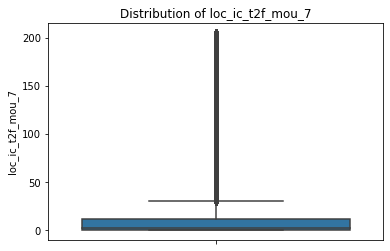

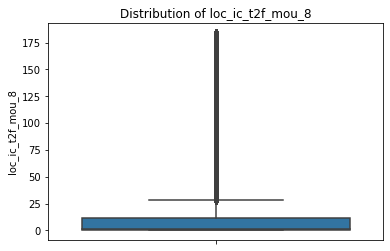

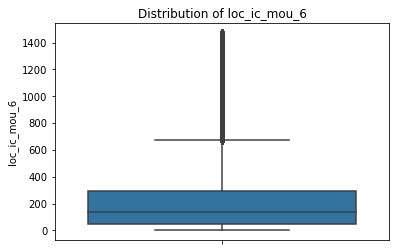

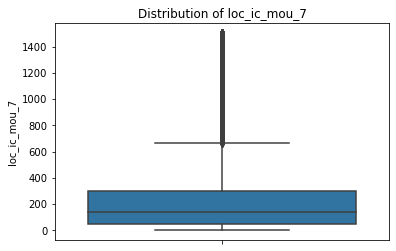

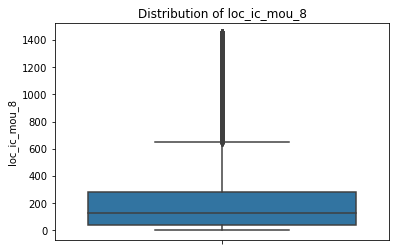

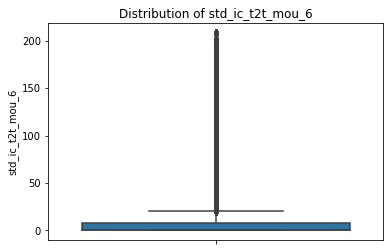

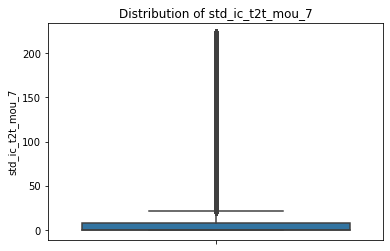

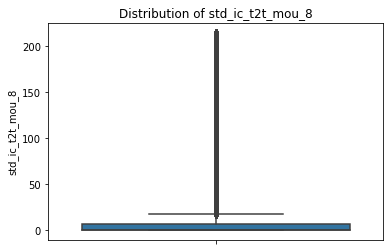

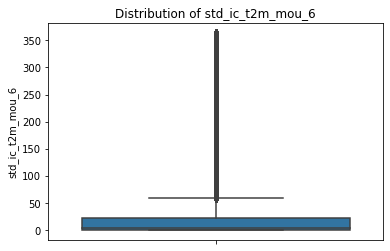

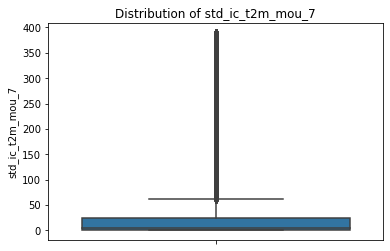

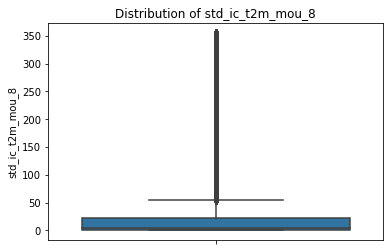

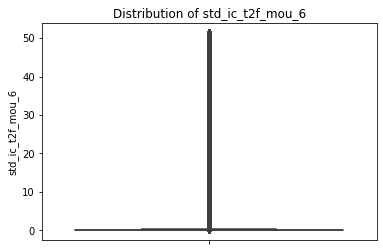

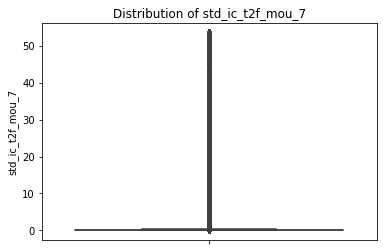

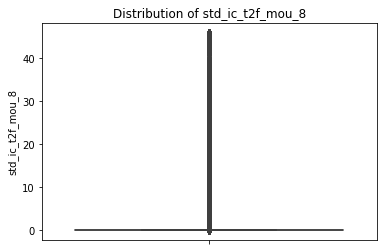

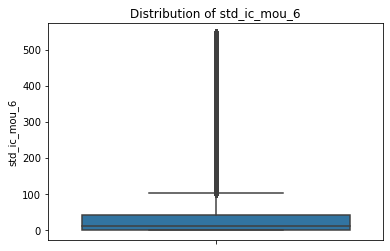

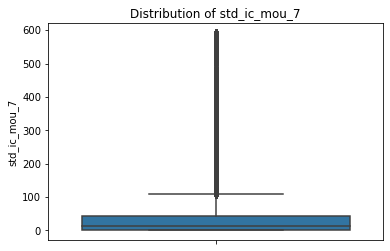

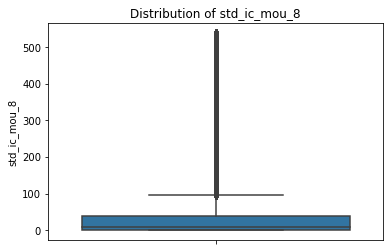

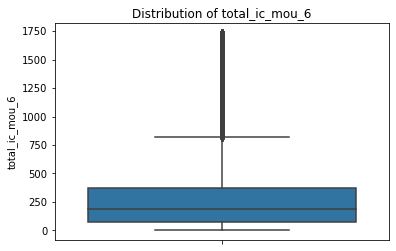

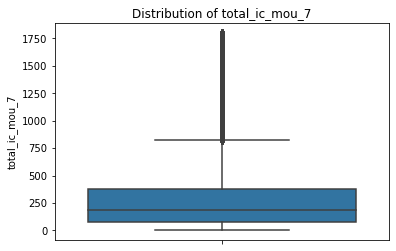

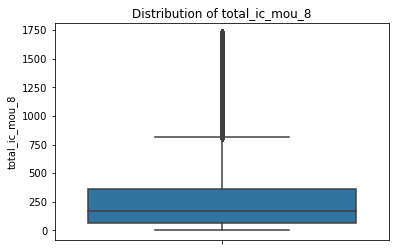

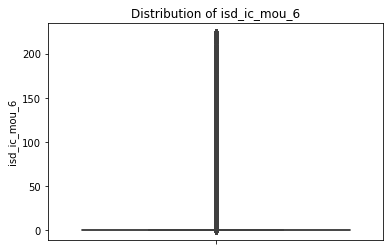

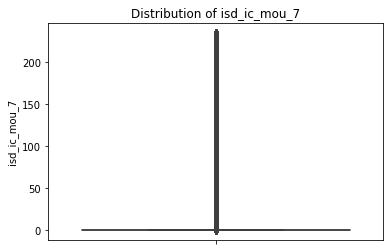

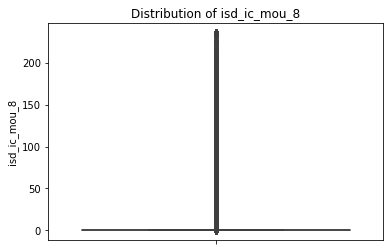

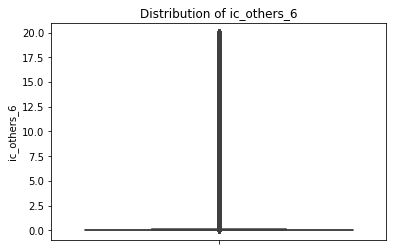

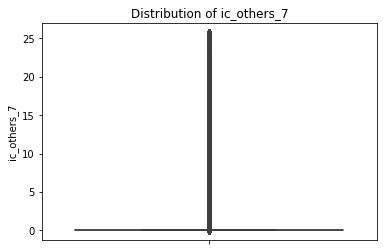

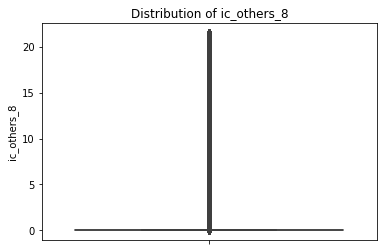

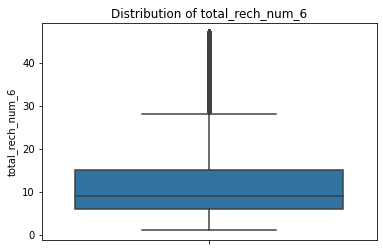

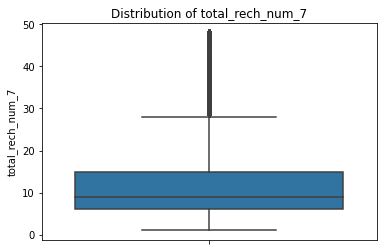

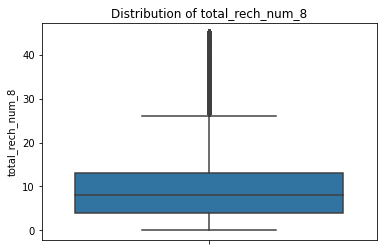

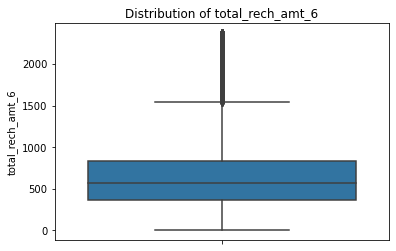

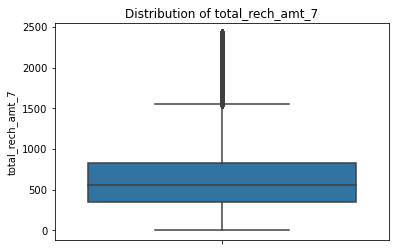

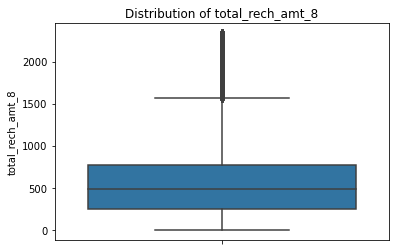

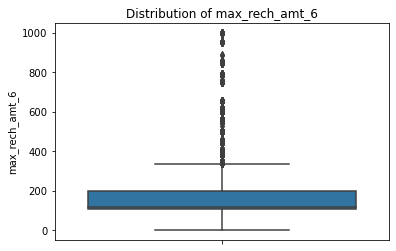

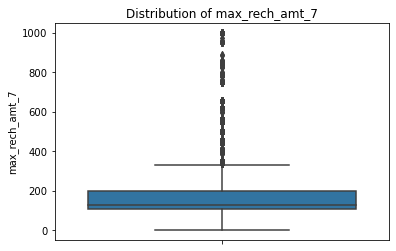

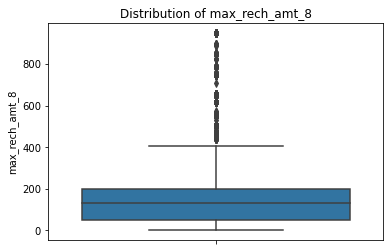

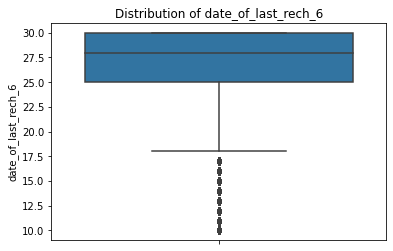

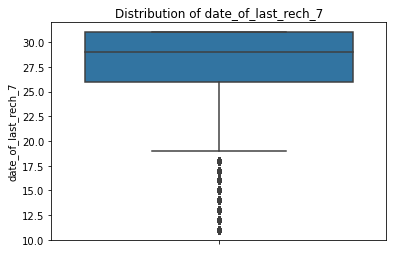

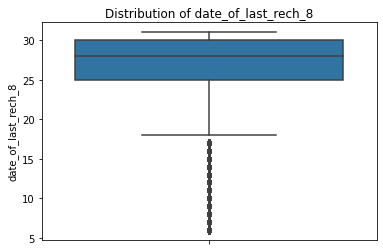

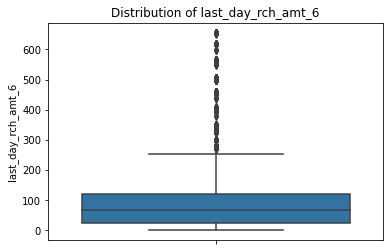

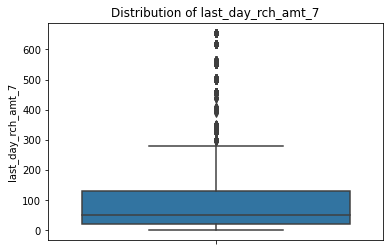

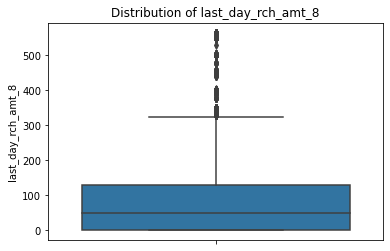

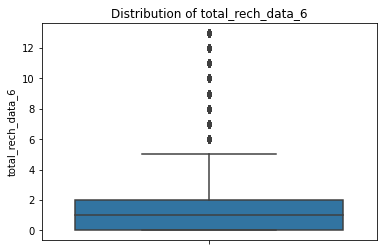

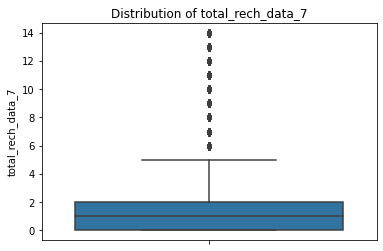

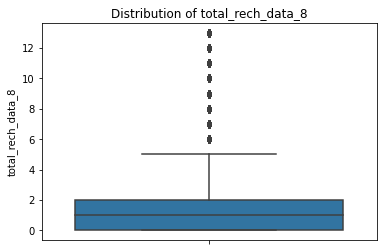

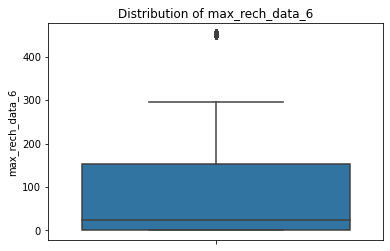

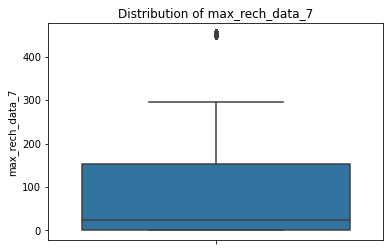

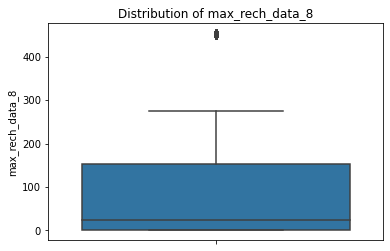

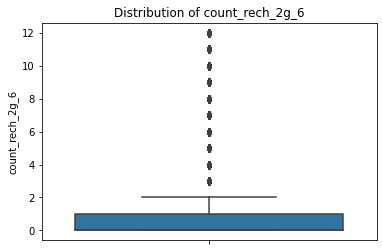

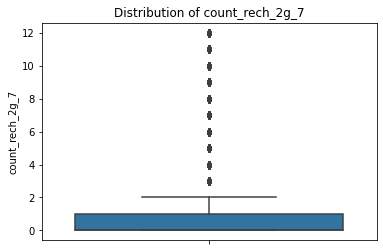

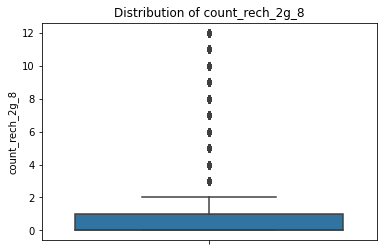

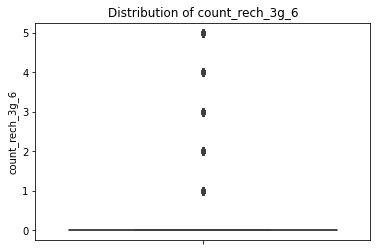

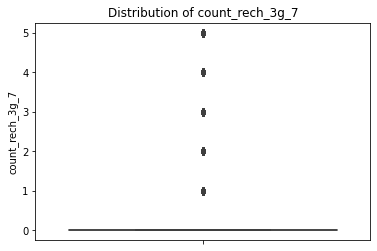

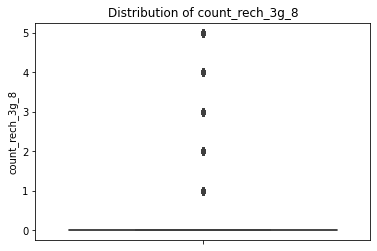

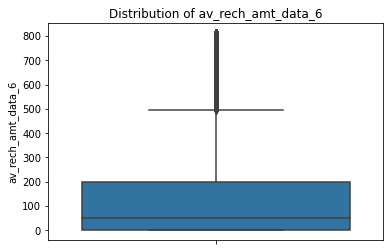

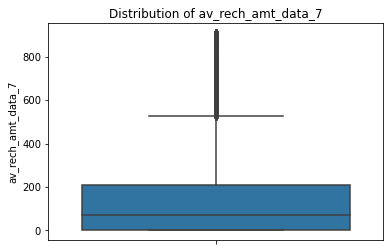

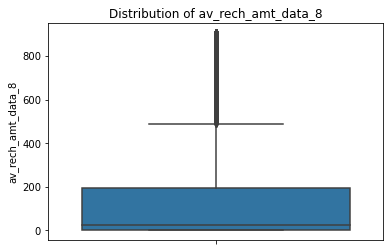

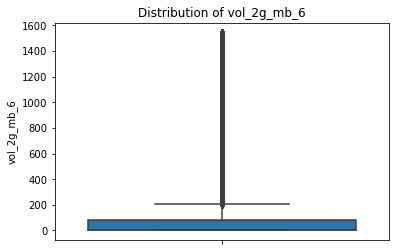

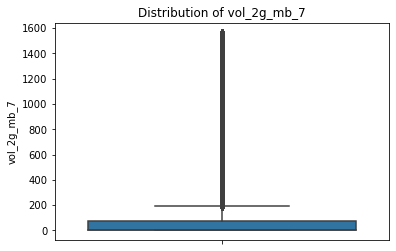

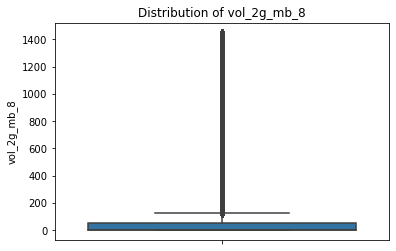

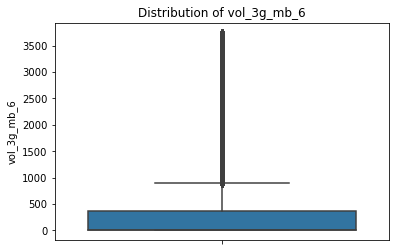

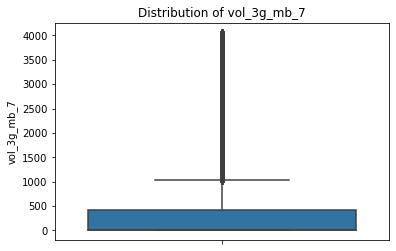

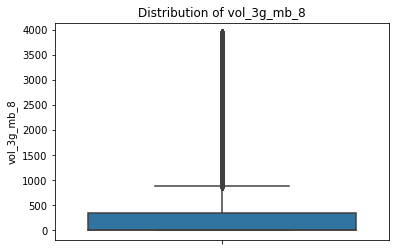

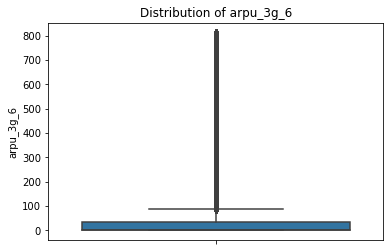

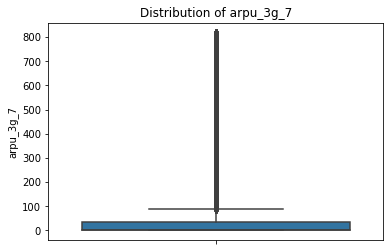

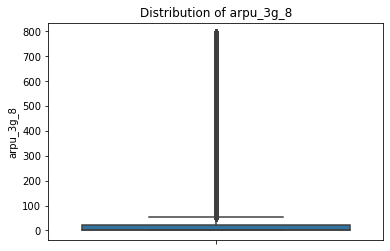

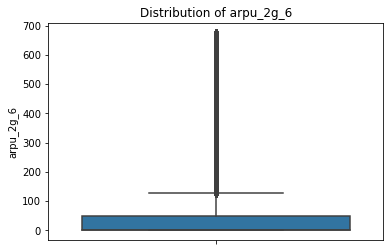

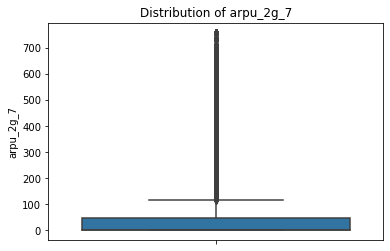

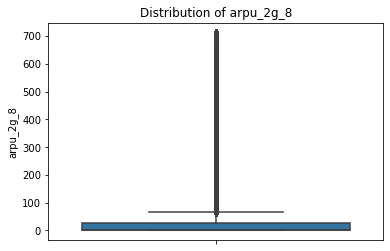

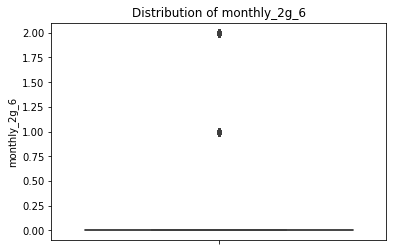

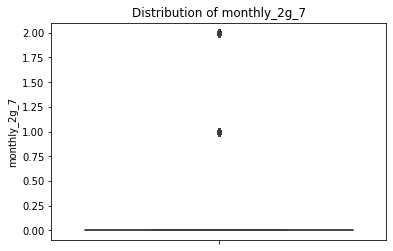

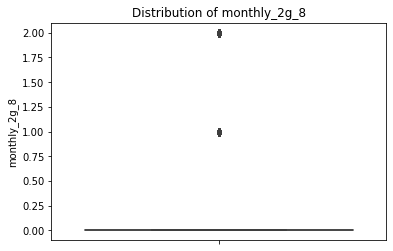

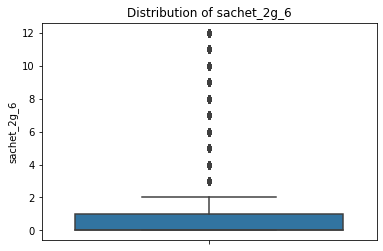

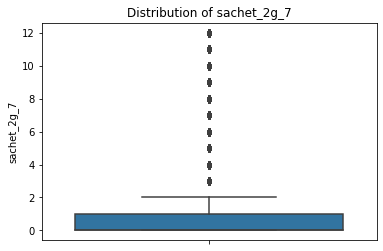

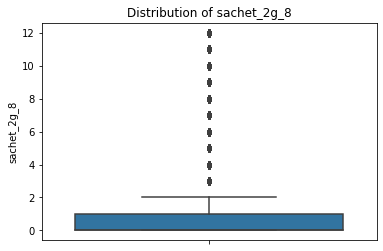

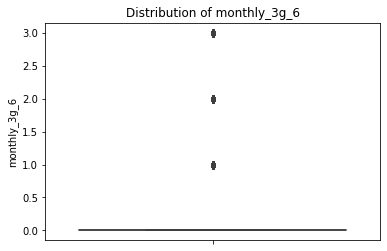

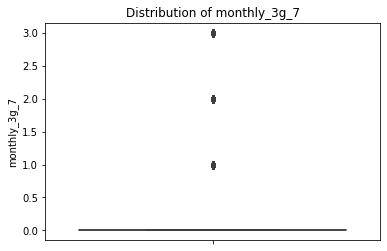

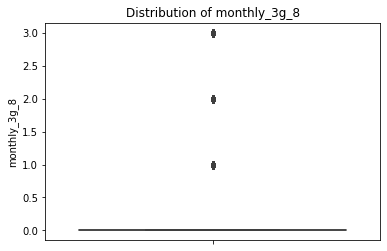

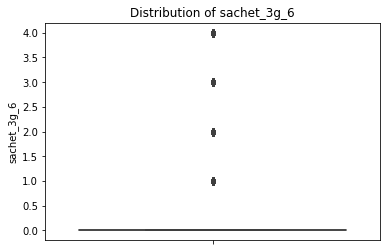

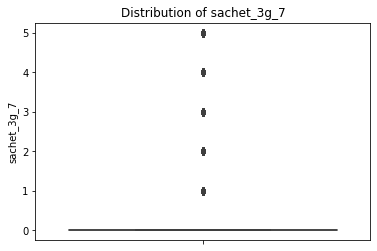

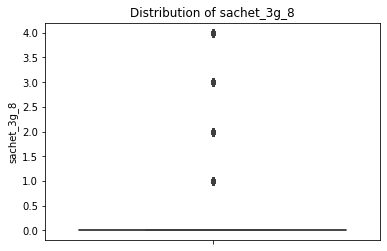

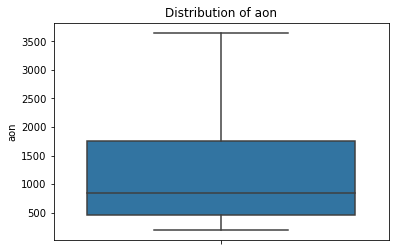

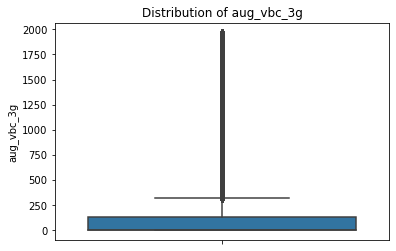

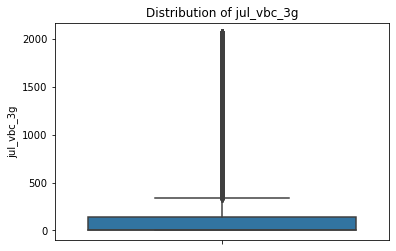

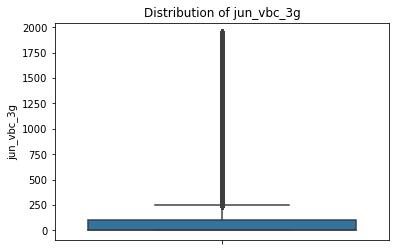

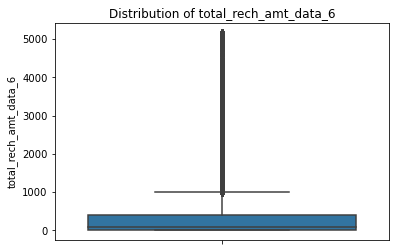

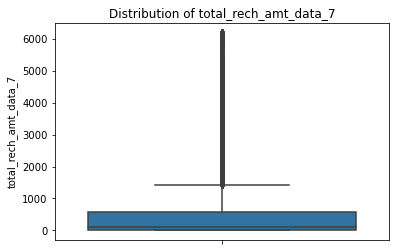

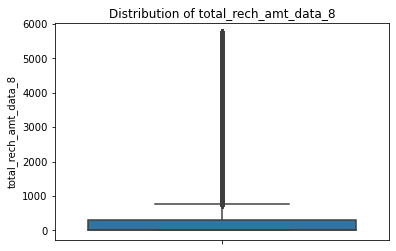

In [53]:
for numeric_variable in churn_data_hv_der._get_numeric_data():
    plot_box(churn_data_hv_der, numeric_variable)

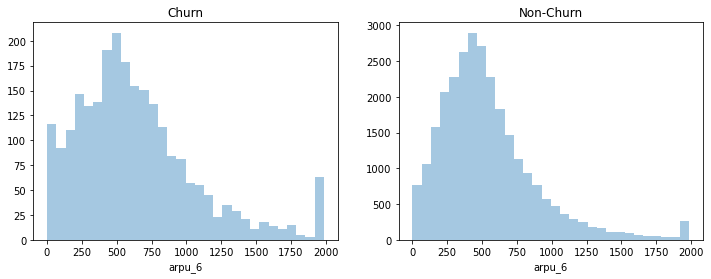

In [54]:
biVariate('arpu_6')

From the Above Figure we can observe that most of the churn cases are with the users with high revenue for 6th month

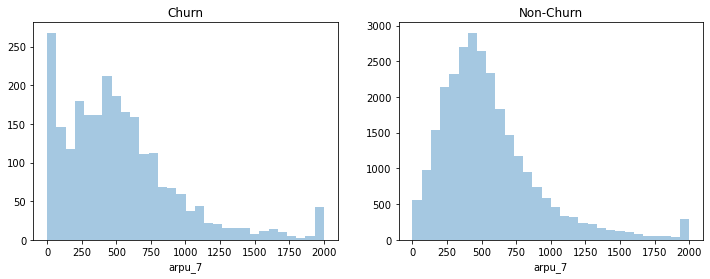

In [55]:
biVariate('arpu_7')

From the Above Figure we can observe that most of the churn cases are with the users with Low revenue and then the second highest is for the users with high Revenue for 7th month

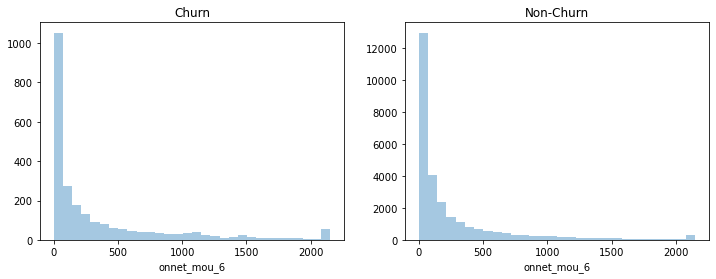

In [56]:
biVariate('onnet_mou_6')

We Observe that the Customers who use it for same network calling with minimun usage are more prone to churn in month 6

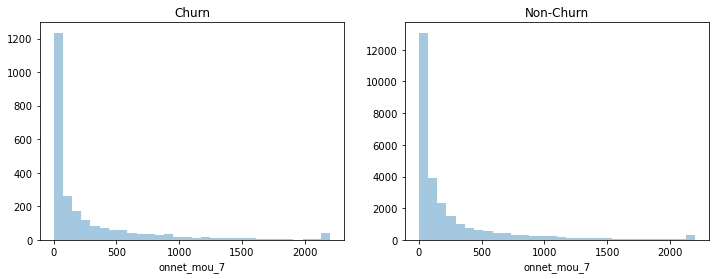

In [57]:
biVariate('onnet_mou_7')

The same is the case for month 7

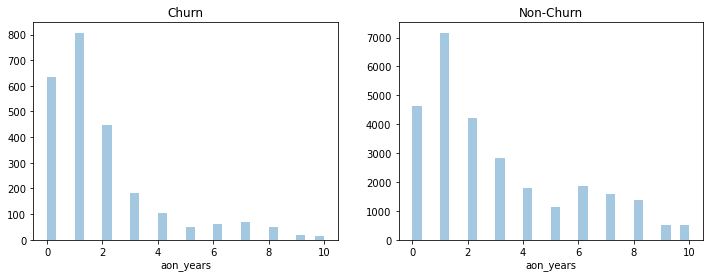

In [58]:
biVariate('aon_years')

As we can observe that the users who use the network for 1 year are more probable to churn who are around 800

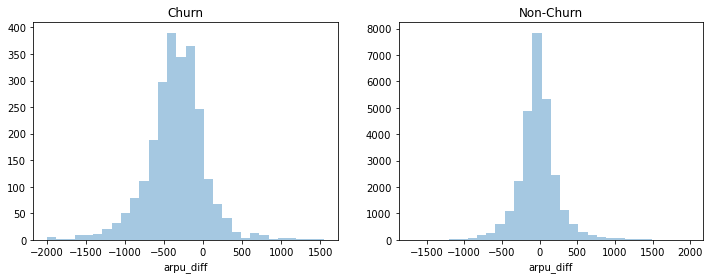

In [59]:
biVariate('arpu_diff')

arpu_diff is the difference between the 8th month and the average of the 6 and 7th months user revenue,from this we can infer that the if the revenue is in negative the customer is more probable to churn,we can observe that for most of the customers with churn it is less than zero.

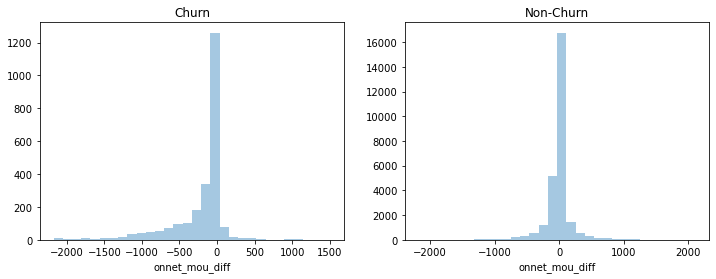

In [60]:
biVariate('onnet_mou_diff')

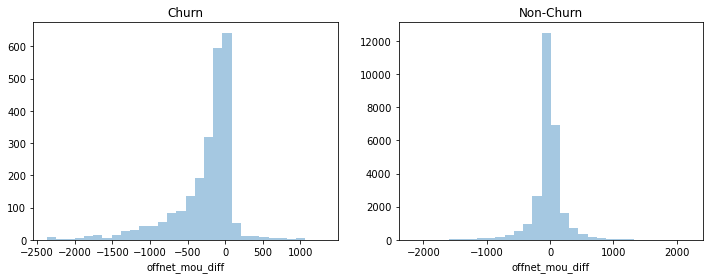

In [61]:
biVariate('offnet_mou_diff')

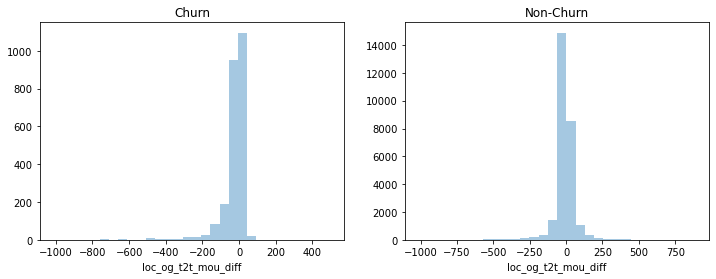

In [62]:
biVariate('loc_og_t2t_mou_diff')

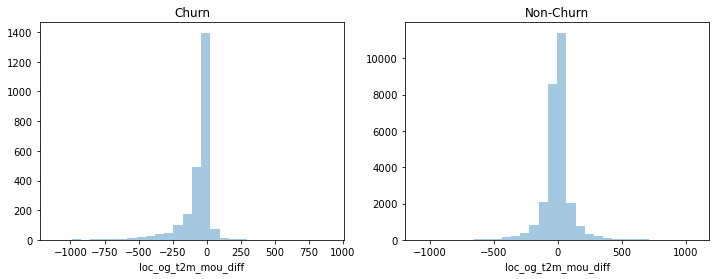

In [63]:
biVariate('loc_og_t2m_mou_diff')

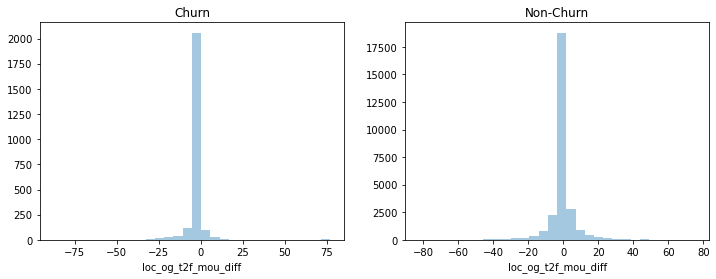

In [64]:
biVariate('loc_og_t2f_mou_diff')

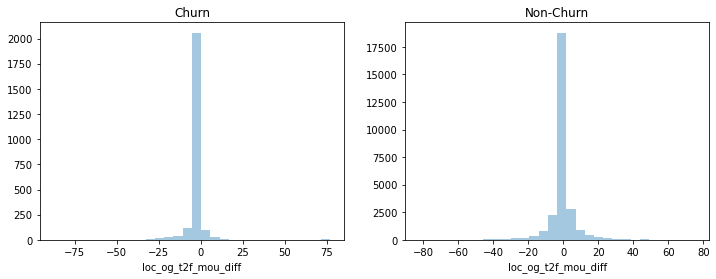

In [65]:
biVariate('loc_og_t2f_mou_diff')

From the above plots we can observe that same behaviour i.e if the difference in the call duration is Negative the customer is more probable to churn

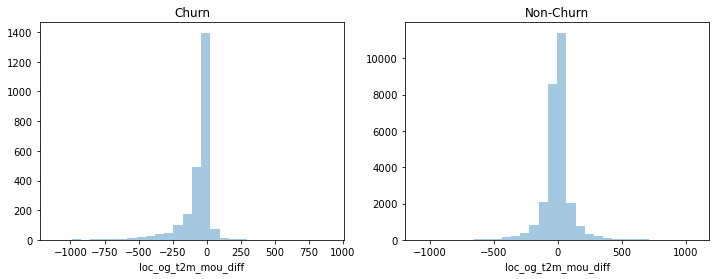

In [66]:
biVariate('loc_og_t2m_mou_diff')

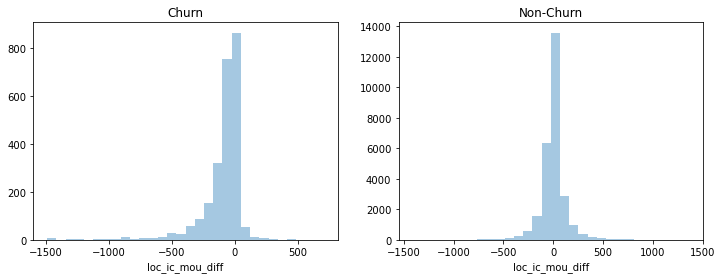

In [67]:
biVariate('loc_ic_mou_diff')

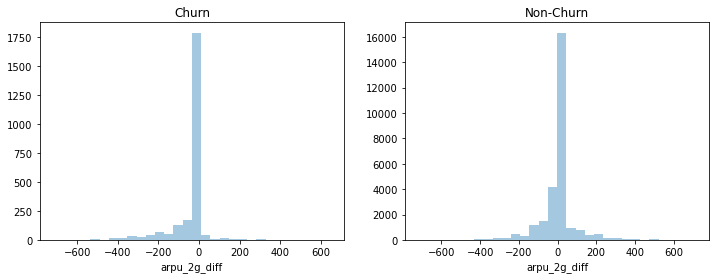

In [68]:
biVariate("arpu_2g_diff")

In [69]:
churn_data_hv_derived.shape

(30001, 197)

No handles with labels found to put in legend.


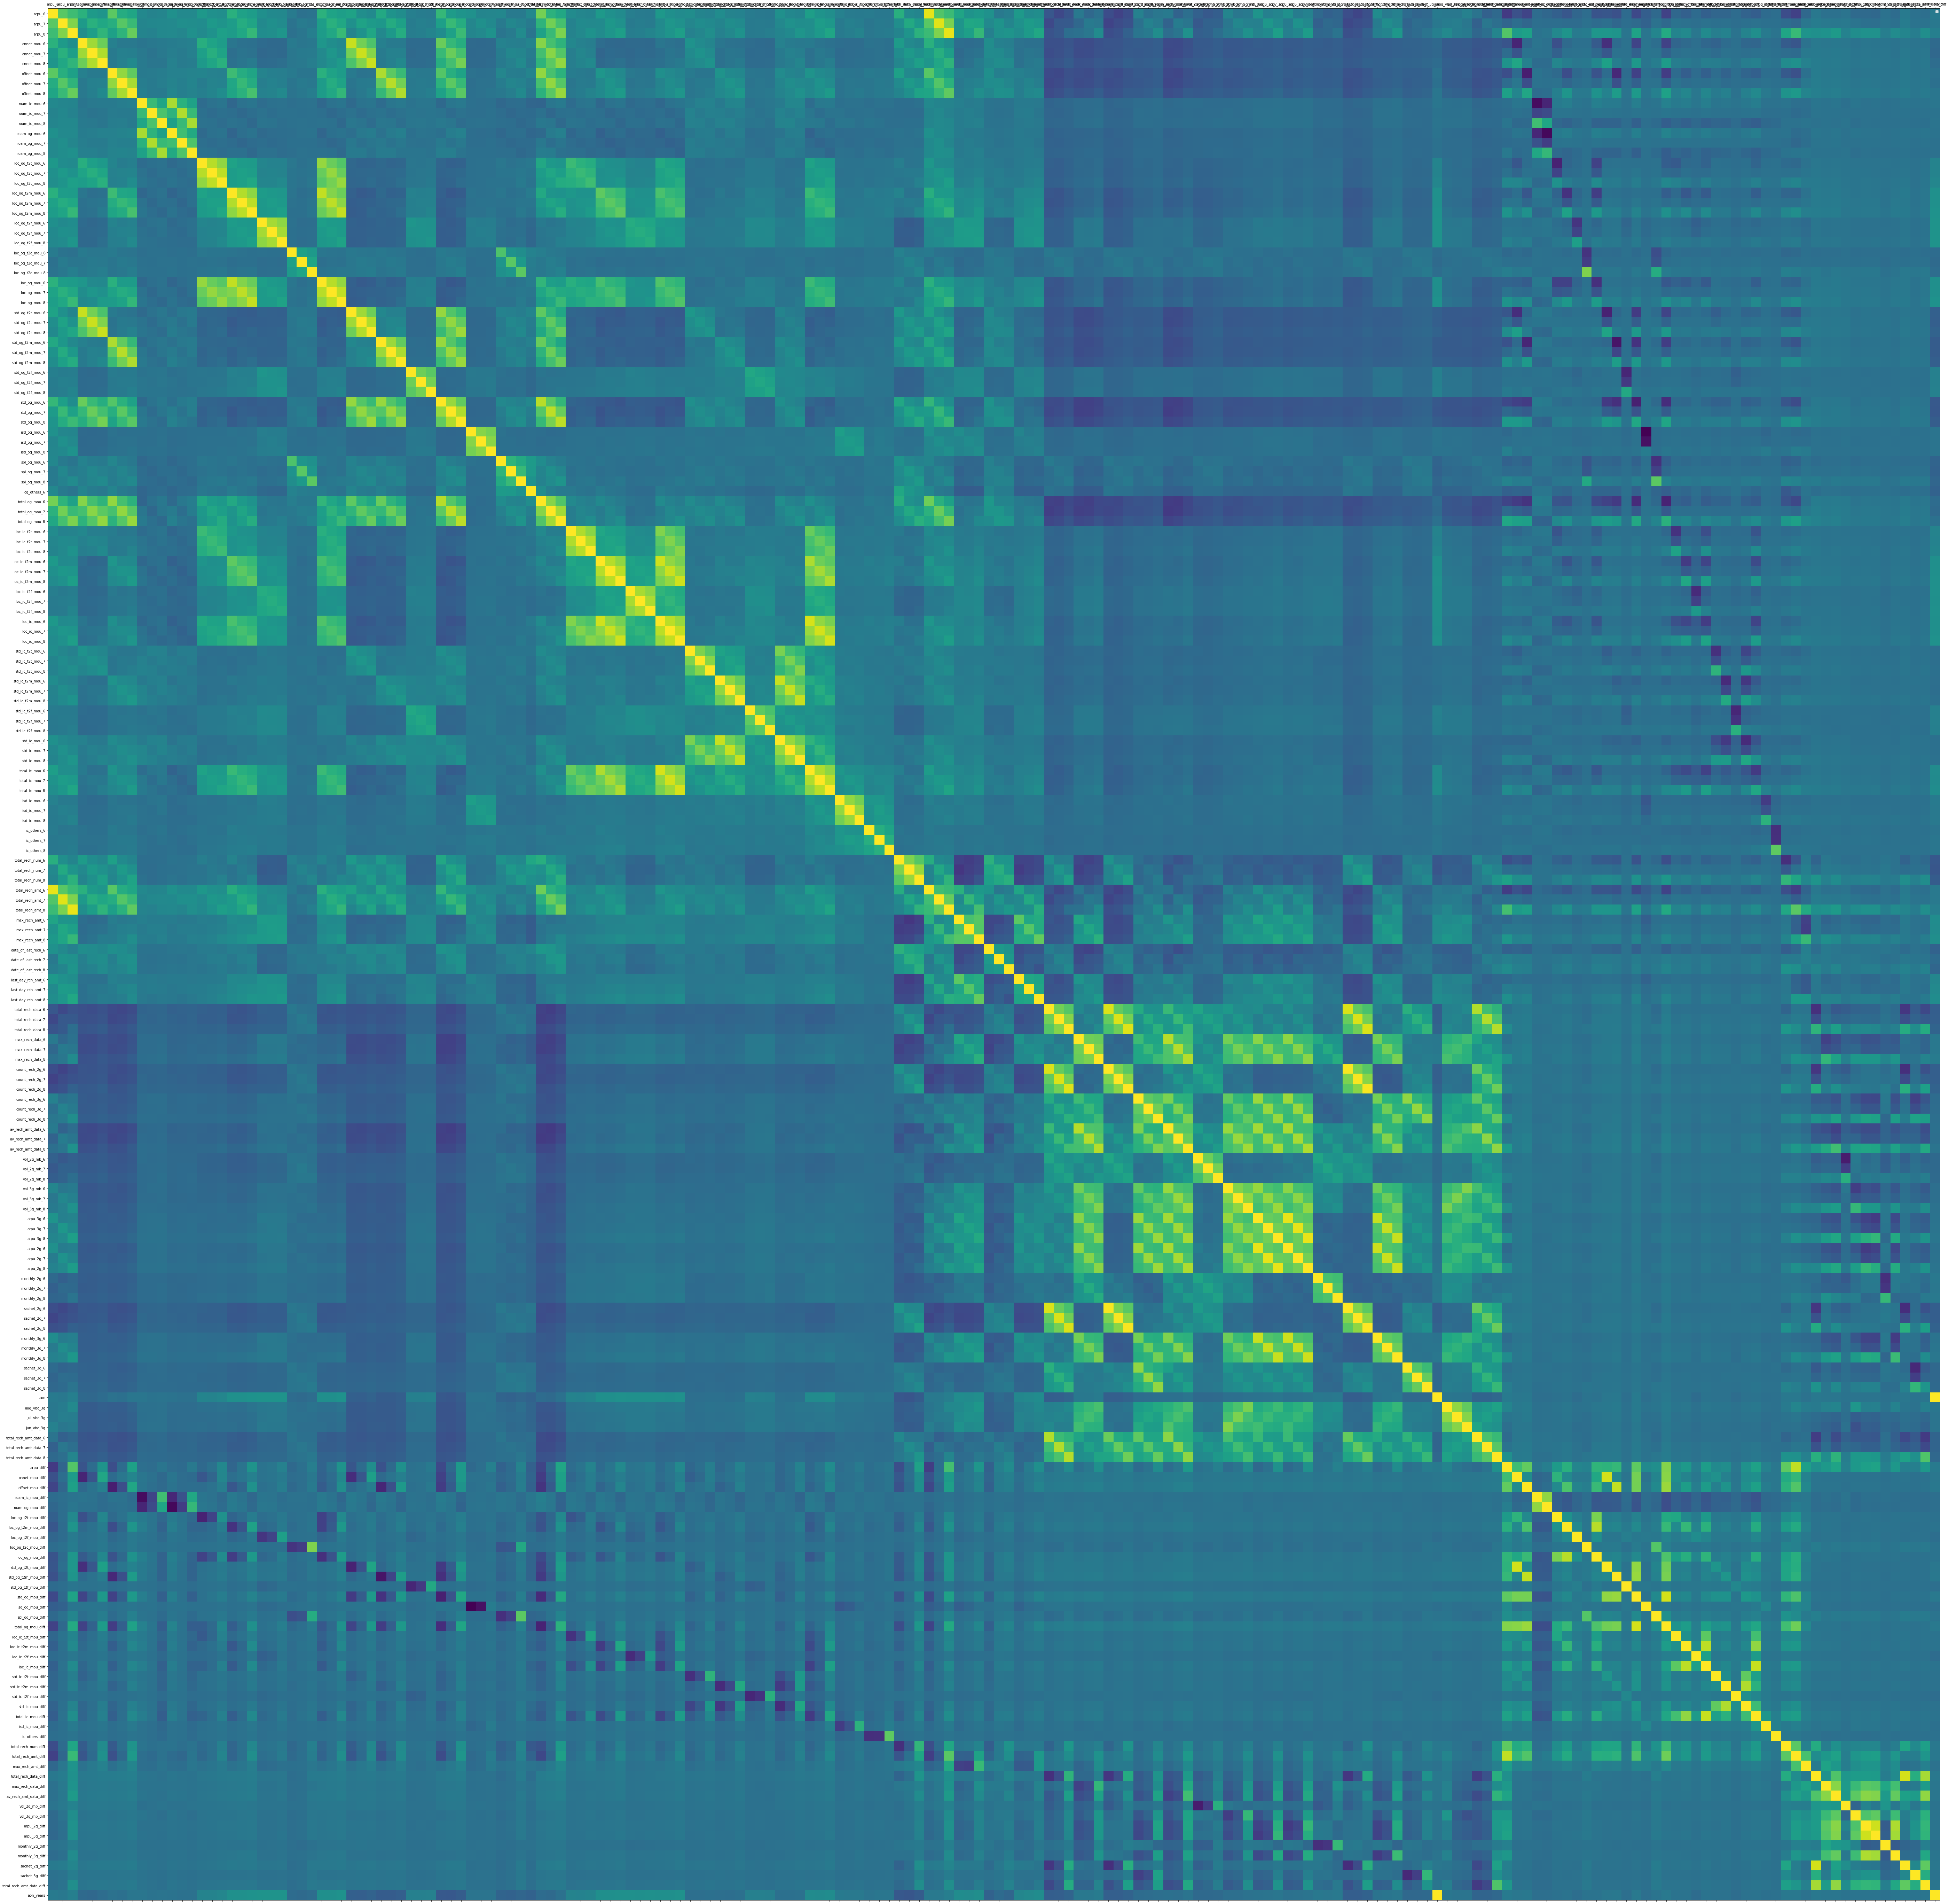

In [70]:
corr_matrix = churn_data_hv_derived.corr()
fig, ax = plt.subplots(figsize=(120, 100))
ax.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
ax.legend()
plt.show()

In [71]:
correlation_matrix = churn_data_hv_derived.corr()
AbsoluteCorrelationMatrix = correlation_matrix.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(np.bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.9)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y]) 
                     for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

print("Total Number of correlated pairs: ", len(correlated_pairs))
print(correlated_pairs)

Total Number of correlated pairs:  18
[('arpu_6', 'total_rech_amt_6'), ('arpu_7', 'total_rech_amt_7'), ('arpu_8', 'total_rech_amt_8'), ('loc_ic_mou_6', 'total_ic_mou_6'), ('loc_ic_mou_8', 'total_ic_mou_8'), ('total_rech_data_6', 'count_rech_2g_6'), ('total_rech_data_6', 'sachet_2g_6'), ('total_rech_data_7', 'count_rech_2g_7'), ('total_rech_data_7', 'sachet_2g_7'), ('total_rech_data_8', 'count_rech_2g_8'), ('total_rech_data_8', 'sachet_2g_8'), ('count_rech_2g_6', 'sachet_2g_6'), ('count_rech_2g_7', 'sachet_2g_7'), ('count_rech_2g_8', 'sachet_2g_8'), ('arpu_3g_6', 'arpu_2g_6'), ('arpu_3g_7', 'arpu_2g_7'), ('arpu_3g_8', 'arpu_2g_8'), ('aon', 'aon_years')]


In [72]:
corr_matrix = churn_data_hv_derived.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
churn_data_hv_derived.drop(columns=to_drop, axis=1,inplace=True)

In [73]:
churn_data_hv_derived.shape

(30001, 182)

# Creating Dummies

In [74]:
#Prepare dummy variables for Categorical Variables
churn_data_hv_derived_cat = churn_data_hv_derived[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']]


In [75]:
churn_data_hv_derived_cat_dummies = pd.get_dummies(churn_data_hv_derived_cat, drop_first = True)
print(churn_data_hv_derived_cat_dummies.shape)

(30001, 12)


In [76]:
churn_data_hv_derived = pd.concat([churn_data_hv_derived, churn_data_hv_derived_cat_dummies], axis=1)
print(churn_data_hv_derived.shape)
churn_data_hv_derived = churn_data_hv_derived.drop(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'], axis=1)


(30001, 194)


In [77]:
print(churn_data_hv_derived.shape)

(30001, 188)


# Model Building

#### Split the Data in to Train and Test

In [78]:
# Select Features in X
X = churn_data_hv_derived.drop(['churn'],axis=1)

# Select Target in y
y = churn_data_hv_derived['churn']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size=0.25,random_state=100)

print(X_train.shape)
print(X_test.shape)

(22500, 187)
(7501, 187)


In [80]:
print("Churn 1 in train ",sum(y_train==1))
print("Churn 0 in train ",sum(y_train==0))
print("Churn 1 in test ",sum(y_test==1))
print("Churn 0 in test ",sum(y_test==0))

Churn 1 in train  1805
Churn 0 in train  20695
Churn 1 in test  636
Churn 0 in test  6865


We have have class imbalance in the target variable, Lets use class_weight 'balanced'.

In [81]:
scaler = StandardScaler()

In [82]:
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

### PCA

In [83]:
pca = PCA()

In [84]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Making a scree plot for the explained variance

In [85]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

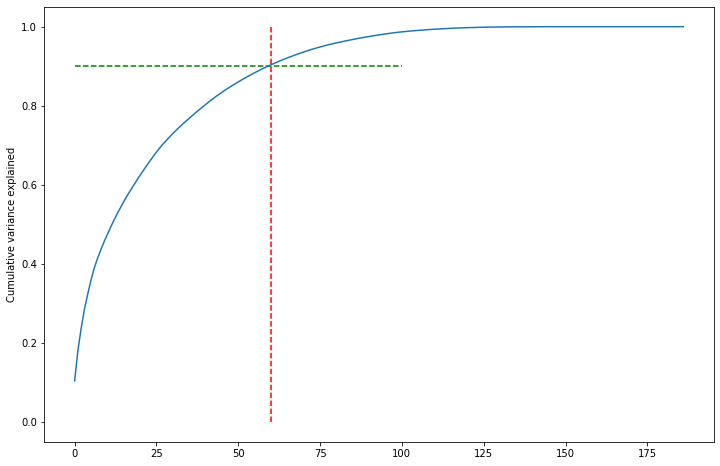

In [86]:
fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=100, xmin=0, colors="g", linestyles="--")
plt.show()

We can 90% variance in data, perform PCA with 60 components

In [87]:
pca_final = IncrementalPCA(n_components=60)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(22500, 60)

In [88]:
corrmat = np.corrcoef(df_train_pca.transpose())

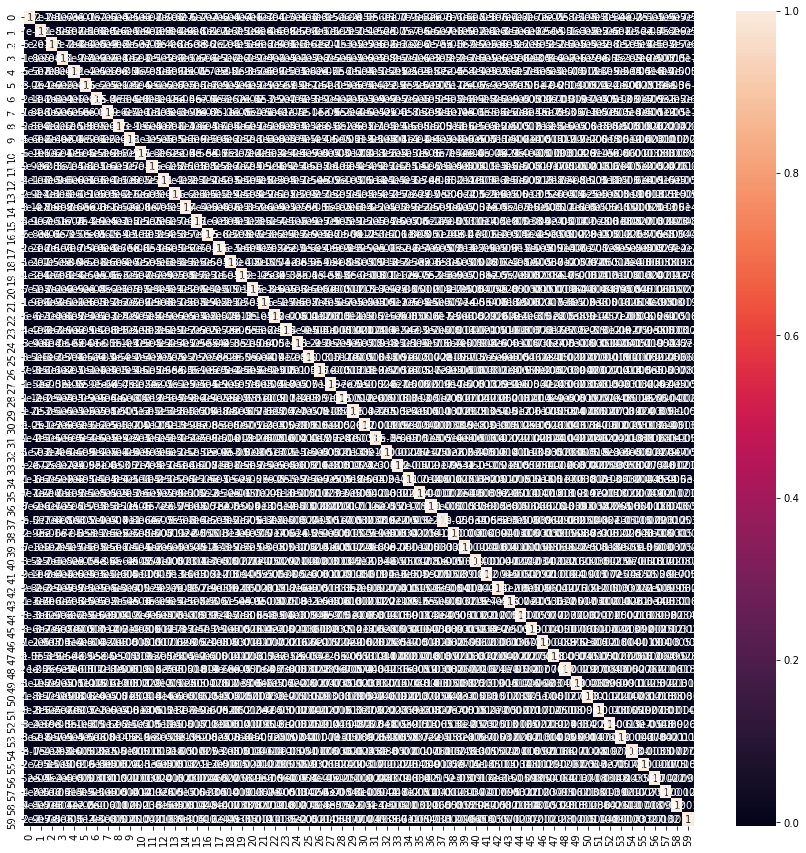

In [89]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [90]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(7501, 60)

In [91]:
def confusion_matrix_image(y_test,y_pred_model):
    cm = confusion_matrix(y_test, y_pred_model)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Non-churn','Churn']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

### Logistic Regression on PCA

In [92]:
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

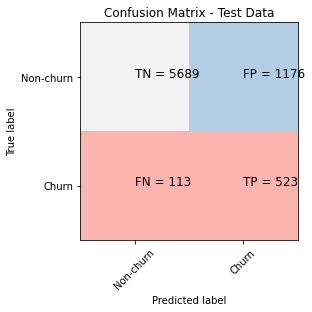

precision_score 0.31
recall_score 0.82


In [93]:
y_test_pred= model_pca.predict(df_test_pca)
confusion_matrix_image(y_test,y_test_pred)
print("precision_score", round(precision_score(y_test,y_test_pred),2))
print("recall_score", round(recall_score(y_test,y_test_pred),2))

In [94]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [95]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

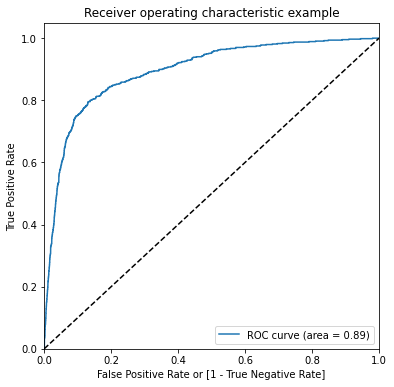

(array([0.00000000e+00, 0.00000000e+00, 1.45666424e-04, ...,
        9.99708667e-01, 9.99854334e-01, 1.00000000e+00]),
 array([0.        , 0.00157233, 0.00157233, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99640188e+00, 9.96401884e-01, 9.96184843e-01, ...,
        1.20603898e-05, 1.08022683e-05, 5.79833464e-06]))

In [96]:
draw_roc(y_test, pred_probs_test)

# Hyperparameter tuning for PCA with Logistic Regression

In [97]:
# Create Grid Search CV with PCA and Logistic Regression as pipeline steps and roc_auc_score as scoring criteria
pca = PCA()
logistic = LogisticRegression(class_weight='balanced')
steps = [("pca", pca),
         ("logistic", logistic)
        ]
pipeline = Pipeline(steps)
params = {'pca__n_components': [60, 70, 80, 90], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
model = GridSearchCV(estimator=pipeline, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [98]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 22.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=Tr...
                                                           multi_class='warn',
                    

In [99]:
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        7.510230      4.327147         0.109806        0.051034   
1       13.366365      4.817193         0.159009        0.081476   
2        6.462170      0.718561         0.148209        0.063695   
3        9.554946      3.307081         0.173610        0.079293   
4        6.665381      1.394413         0.103406        0.022125   
5        9.729956      3.373228         0.099206        0.018050   
6        6.444969      0.467205         0.115207        0.014525   
7       14.897852      5.059697         0.215012        0.177055   
8        8.961512      3.420897         0.253014        0.140608   
9        8.676896      3.803351         0.137008        0.069953   
10       7.573833      2.665181         0.127607        0.032899   
11      10.760616      3.171270         0.114606        0.044430   
12       7.507429      1.615332         0.110006        0.021044   
13       9.609950      1.788315         0.143208        0.065114   
14       8.829705      3.051532         0.112607        0.040616   
15      10.509401      5.161677         0.095605        0.013002   
16       4.613264      0.609979         0.073204        0.011840   
17       5.483314      2.247941         0.085005        0.008319   
18       6.050346      1.923652         0.083005        0.012523   
19       7.800246      1.311578         0.161409        0.082123   
20       7.128608      2.288150         0.156409        0.040630   
21       8.605692      2.930446         0.106406        0.022170   
22       7.585634      2.502968         0.144608        0.070643   
23       8.440083      1.904164         0.143808        0.053334   
24       5.507715      1.326308         0.115407        0.016182   
25       7.173010      1.859065         0.108206        0.027919   
26       6.077348      0.566374         0.123007        0.064520   
27       9.276531      1.896064         0.107206        0.009021   
28       6.342763      1.991354         0.103406        0.040085   
29       6.884194      2.289632         0.122807        0.040752   
30       8.588091      1.883511         0.125807        0.037115   
31       7.883251      1.272078         0.160009        0.104281   
32       5.889537      1.461325         0.121607        0.049777   
33       7.404823      2.119278         0.161009        0.068403   
34      10.462798      2.956106         0.144808        0.043021   
35      20.080349     14.233983         0.487828        0.471133   
36       9.572348      7.709588         0.088605        0.038105   
37       6.329562      1.586116         0.124607        0.057964   
38       9.858164      3.789007         0.122007        0.046770   
39      10.447998      2.167888         0.237214        0.176225   
40       9.061918      6.003709         0.125207        0.045414   
41      12.097492      6.929772         0.176410        0.171581   
42       8.383680      1.910277         0.195611        0.091181   
43       9.883765      2.217132         0.141408        0.071086   
44       5.574319      2.419015         0.097206        0.055983   
45       5.774930      1.853932         0.118007        0.079571   
46       5.587319      0.443304         0.096606        0.026335   
47       7.827448      2.535627         0.123407        0.046640   
48       6.752586      3.077900         0.115007        0.050290   
49       5.969141      1.232095         0.133208        0.085359   
50       7.465827      2.403530         0.176810        0.134920   
51       8.594291      2.555678         0.176410        0.060826   
52       6.534974      2.061582         0.083405        0.009770   
53       5.815733      0.462776         0.140208        0.043294   
54       8.851906      2.649818         0.096606        0.021520   
55       7.840448      1.487441         0.109806        0.027288   
56       5.987942      2.185335         0.078605        0.012420   
57       6.342563      2.423999         0.086405        0.01

In [100]:
print("Best AUC Score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC Score:  0.895372241210725
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 90}


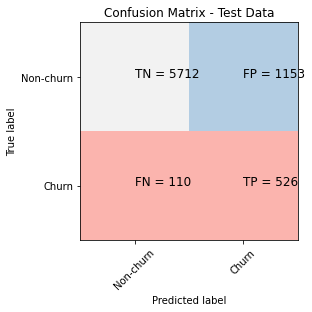

precision_score 0.31
recall_score 0.83


In [101]:
y_test_pred= model.predict(X_test)
confusion_matrix_image(y_test,y_test_pred)
print("precision_score", round(precision_score(y_test,y_test_pred),2))
print("recall_score", round(recall_score(y_test,y_test_pred),2))

In [102]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

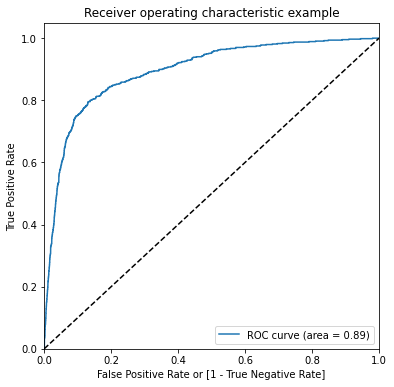

(array([0.00000000e+00, 0.00000000e+00, 1.45666424e-04, ...,
        9.99708667e-01, 9.99854334e-01, 1.00000000e+00]),
 array([0.        , 0.00157233, 0.00157233, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99640188e+00, 9.96401884e-01, 9.96184843e-01, ...,
        1.20603898e-05, 1.08022683e-05, 5.79833464e-06]))

In [103]:
draw_roc(y_test, pred_probs_test)

## Logistic Regression with PCA Metrics.

In [104]:
confusion = metrics.confusion_matrix(y_test,y_test_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_test_pred))

# Let's see the sensitivity of our logistic regression model
print('Recall /Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('True Negative Rate / Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Precision / Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8316224503399546
Recall /Sensitivity:  0.8270440251572327
True Negative Rate / Specificity:  0.8320466132556446
false postive rate:  0.16795338674435542
Precision / Positive predictive value:  0.3132817153067302
Negative predictive value:  0.9811061490896599
Misclassification Rate:  0.16837754966004534


## Random Forest

In [105]:
param_grid = {
    'max_depth': [8, 10],    
    'max_features': ['auto', 0.2, 0.4, 0.6],    
    'criterion': ['gini','entropy']
}
rf = RandomForestClassifier(class_weight='balanced')
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1, scoring ='roc_auc')

In [106]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                    

In [107]:
# print best hyperparameters
print("Best AUC: ", grid_search.best_score_)
print("Best hyperparameters: ", grid_search.best_params_)

Best AUC:  0.9272810088090393
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 0.2}


In [120]:
rf_model = RandomForestClassifier(max_features=0.2, class_weight='balanced',  max_depth=8, criterion='entropy', random_state=4, n_jobs=-1, verbose=1)

In [121]:
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.8s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=8, max_features=0.2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=False,
                       random_state=4, verbose=1, warm_start=False)

In [122]:
y_test_pred = rf_model.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


In [123]:
confusion = metrics.confusion_matrix(y_test,y_test_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_test_pred))

# Let's see the sensitivity of our logistic regression model
print('Recall /Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('True Negative Rate / Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Precision / Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.9270763898146914
Recall /Sensitivity:  0.7657232704402516
True Negative Rate / Specificity:  0.9420247632920612
false postive rate:  0.05797523670793882
Precision / Positive predictive value:  0.5502824858757062
Negative predictive value:  0.9774788391777509
Misclassification Rate:  0.07292361018530863


# Logistic Regression

In [175]:
logistic = LogisticRegression(class_weight='balanced')
rfe = RFE(logistic, 40)         
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           
print(rfe.ranking_)

[False  True  True  True  True False False False False False False False
 False False False False  True False False  True False False False False
 False False False False  True  True  True  True False False  True  True
 False False False False  True  True False False False False False False
 False  True False False  True  True  True  True  True  True False False
  True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False  True False False  True False
 False False False False False False  True False False False False False
 False  True False False False False False False False False False False
  True False False  True False  True  True False False False False  True
 False  True  True False False False False False False False  True False
 False False False False False False  True False False False False False
 False  True False False False False False False Fa

In [176]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 21),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 2),
 ('offnet_mou_6', False, 79),
 ('offnet_mou_7', False, 30),
 ('offnet_mou_8', False, 76),
 ('roam_ic_mou_6', False, 130),
 ('roam_ic_mou_7', False, 60),
 ('roam_ic_mou_8', False, 132),
 ('roam_og_mou_6', False, 133),
 ('roam_og_mou_7', False, 98),
 ('roam_og_mou_8', False, 4),
 ('loc_og_t2t_mou_6', False, 18),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', False, 10),
 ('loc_og_t2m_mou_6', False, 24),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', False, 3),
 ('loc_og_t2f_mou_6', False, 124),
 ('loc_og_t2f_mou_7', False, 27),
 ('loc_og_t2f_mou_8', False, 138),
 ('loc_og_t2c_mou_6', False, 142),
 ('loc_og_t2c_mou_7', False, 146),
 ('loc_og_t2c_mou_8', False, 68),
 ('loc_og_mou_6', False, 23),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_m

In [177]:
# logistic regression
logistic = LogisticRegression(class_weight='balanced')
params = {'C': [0.1, 0.5, 1, 2], 'penalty': ['l1', 'l2']}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [178]:
X_train1 = X_train[X_train.columns[rfe.support_]]

In [179]:
model.fit(X_train1,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [180]:
print(model.best_score_)
print(model.best_params_)

0.8944573575187446
{'C': 0.1, 'penalty': 'l2'}


In [181]:
X_test1 = X_test[X_test.columns[rfe.support_]]

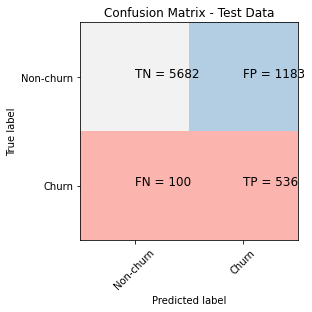

precision_score 0.31
recall_score 0.84


In [182]:
y_test_pred= model.predict(X_test1)
confusion_matrix_image(y_test,y_test_pred)
print("precision_score", round(precision_score(y_test,y_test_pred),2))
print("recall_score", round(recall_score(y_test,y_test_pred),2))

In [183]:
confusion = metrics.confusion_matrix(y_test,y_test_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_test_pred))

# Let's see the sensitivity of our logistic regression model
print('Recall /Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('True Negative Rate / Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Precision / Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8289561391814425
Recall /Sensitivity:  0.8427672955974843
True Negative Rate / Specificity:  0.8276766205389657
false postive rate:  0.17232337946103424
Precision / Positive predictive value:  0.31180919139034324
Negative predictive value:  0.9827049463853338
Misclassification Rate:  0.17104386081855752


**Of all the three models, random forest has good precision and recall values, Logistic regression have less Precision value compared to random forest, So choosing Important features from Random Forest.**

# Feature importance

In [184]:
features = X_train.columns
importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


variables  importance_percentage
0                loc_ic_mou_8              11.601943
1            loc_ic_t2t_mou_8               8.395221
2              total_og_mou_8               8.073410
3          last_day_rch_amt_8               6.159388
4            loc_ic_t2m_mou_8               5.780956
5         total_rech_amt_diff               3.548078
6            loc_og_t2t_mou_8               3.536159
7            loc_og_t2m_mou_8               3.346910
8         date_of_last_rech_8               3.128447
9          av_rech_amt_data_8               2.967313
10              roam_ic_mou_8               2.826157
11                  arpu_diff               2.522126
12              roam_og_mou_8               2.482892
13                vol_2g_mb_8               1.503392
14            max_rech_data_8               1.093358
15            loc_ic_mou_diff               1.007425
16            std_og_mou_diff               0.959846
17              fb_user_8_1.0               0.949430
18          total_og_mou_diff               0.902500
19          total_ic_mou_diff               0.863500
20        total_rech_num_diff               0.797720
21           roam_og_mou_diff               0.704965
22               loc_og_mou_8               0.702644
23            offnet_mou_diff               0.658811
24           roam_ic_mou_diff               0.643064
25        loc_ic_t2m_mou_diff               0.581775
26                     arpu_8               0.556699
27           total_rech_num_7               0.546444
28               std_og_mou_7               0.538715
29                        aon               0.537191
30             max_rech_amt_8               0.520239
31           loc_og_t2f_mou_8               0.477856
32                vol_3g_mb_8               0.476249
33      total_rech_amt_data_8               0.473052
34             vol_2g_mb_diff               0.464746
35               std_ic_mou_8               0.420196
36                     arpu_7               0.408782
37                  arpu_3g_8               0.396278
38               loc_ic_mou_7               0.384618
39           total_rech_num_6               0.351502
40           loc_ic_t2f_mou_8               0.343402
41               offnet_mou_8               0.338904
42             max_rech_amt_7               0.322755
43             max_rech_amt_6               0.321781
44        loc_ic_t2t_mou_diff               0.320031
45           loc_ic_t2m_mou_7               0.313259
46               std_og_mou_8               0.302314
47              roam_og_mou_7               0.295724
48               spl_og_mou_8               0.285539
49        loc_og_t2t_mou_diff               0.281313
50               loc_og_mou_6               0.277058
51           total_rech_num_8               0.268425
52           std_og_t2t_mou_7               0.263103
53           std_ic_t2f_mou_8               0.257010
54                 aug_vbc_3g               0.255180
55               loc_ic_mou_6               0.254457
56             onnet_mou_diff               0.251676
57             total_og_mou_6               0.248975
58                  arpu_3g_7               0.240138
59                     arpu_6               0.237983
60               offnet_mou_6               0.227274
61             vol_3g_mb_diff               0.226887
62         last_day_rch_amt_7               0.224336
63           std_ic_t2m_mou_6               0.220697
64                onnet_mou_7               0.219410
65           loc_og_t2m_mou_7               0.217764
66        std_ic_t2m_mou_diff               0.213347
67             total_ic_mou_7               0.203509
68          max_rech_amt_diff               0.201269
69             ic_others_diff               0.197726
70           loc_ic_t2m_mou_6               0.197168
71           loc_og_t2m_mou_6               0.190321
72        std_og_t2t_mou_diff               0.189032
73        loc_og_t2m_mou_diff               0.188706
74           loc_og_t2t_mou_6               0

In [130]:
#Extracting top 10 features
top_10_features = feature_importance.variables[0:10]
top_10_features

0           loc_ic_mou_8
1       loc_ic_t2t_mou_8
2         total_og_mou_8
3     last_day_rch_amt_8
4       loc_ic_t2m_mou_8
5    total_rech_amt_diff
6       loc_og_t2t_mou_8
7       loc_og_t2m_mou_8
8    date_of_last_rech_8
9     av_rech_amt_data_8
Name: variables, dtype: object

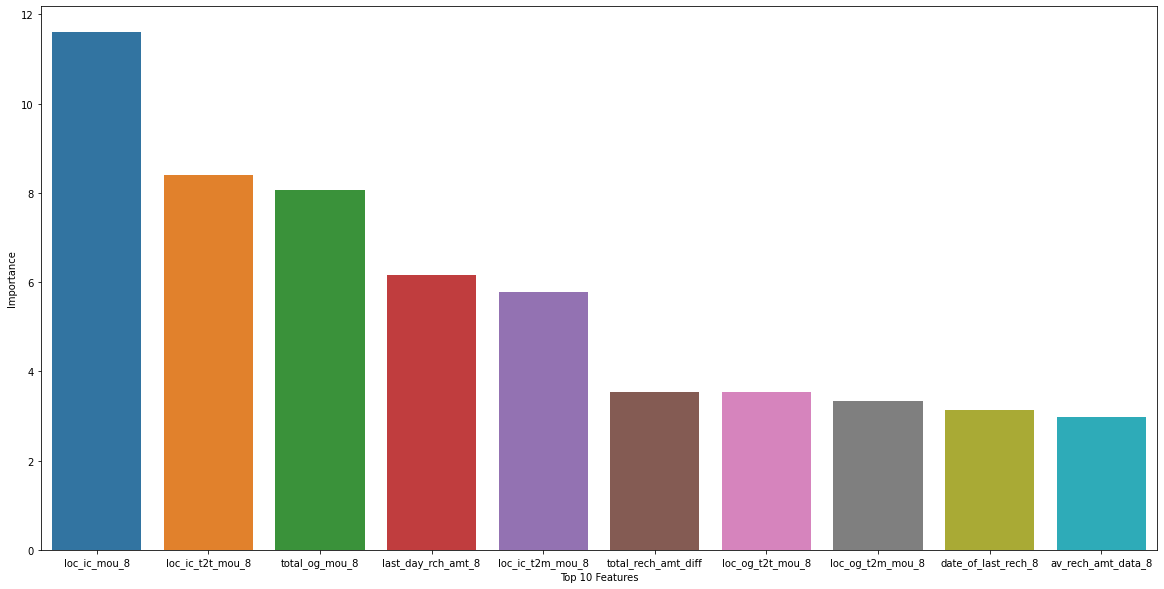

In [132]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='variables', y= 'importance_percentage', data=feature_importance[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.show()

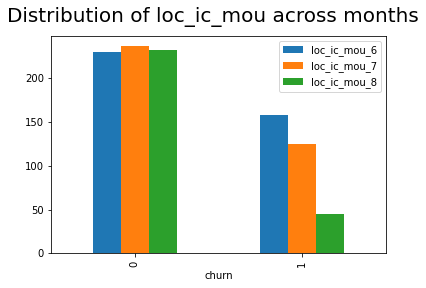

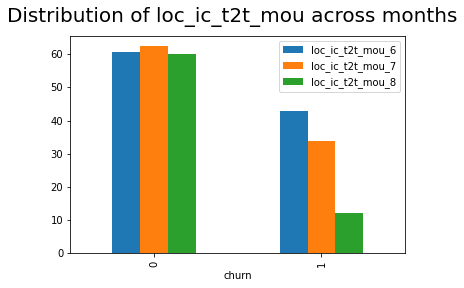

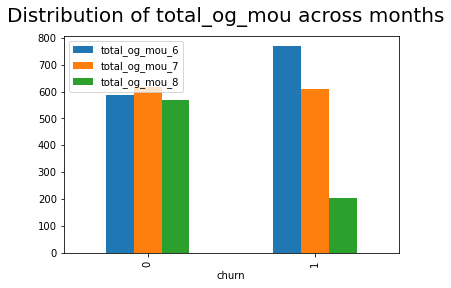

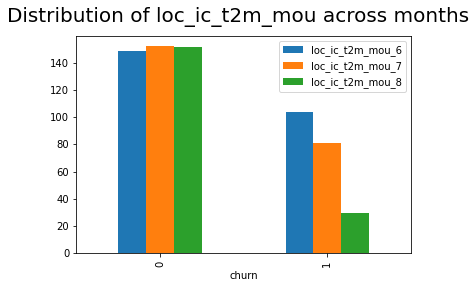

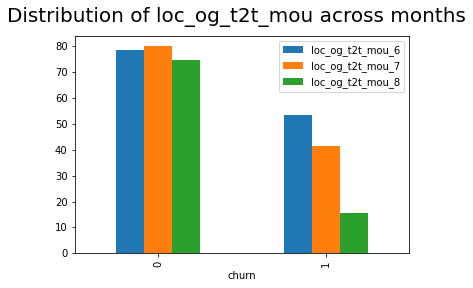

In [141]:
features = ['loc_ic_mou','loc_ic_t2t_mou','total_og_mou','loc_ic_t2m_mou','loc_og_t2t_mou']
for feature in features:
    feature_6 = feature+"_6"
    feature_7 = feature+"_7"
    feature_8 = feature+"_8"
    df_sample = churn_data_hv_derived.groupby(['churn'])[feature_6,feature_7,feature_8].mean()
    df_sample.plot.bar()
    plt.suptitle("Distribution of " +feature+" across months", fontsize=20)
    plt.show()

### Driver Variables of Churn and Churn Analysis & Recommendation

1. loc_ic_mou - Focus on customers whose local incoming calls have decreased, People with lower incoming calls are like to churn. 

2. total_og_mou - Focus on customers whose total outgoing calls have decreased, People with decreased outgoing calls are like to churn. 

3. last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.

4. total_rech_amt_diff - Decrease in total recharge amount also indicates the customer churn, Provide special offers on recharges for customers whose recharge amount is decreasing month after month.

5. av_rech_amt_data_8 - Decrease in Data recharge amount also indicates the customer churn, Provide special offers on recharges for customers whose recharge amount is decreasing month after month.